<font face = "Time New Roman" size = 6>Import need pacages</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from warnings import simplefilter #Filtering warnings
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from datetime import datetime
from scipy import stats

<font face = "Time New Roman" size = 6>Observe the data</font>

<font face = "Time New Roman" size = 5> Import the data set and show the title </font>

# part3_result.csv is the file without deleting the Non registered organizations 
# It's used to compare the result
All the file need be modified manumally before importing

In [2]:
combined_data = pd.read_csv('./part3_result1.csv',encoding = "ISO-8859-1") #Combined data set
# combined_data = pd.read_csv('./part3_result.csv',encoding = "ISO-8859-1") #This is the full data set used to comapare


<AxesSubplot: >

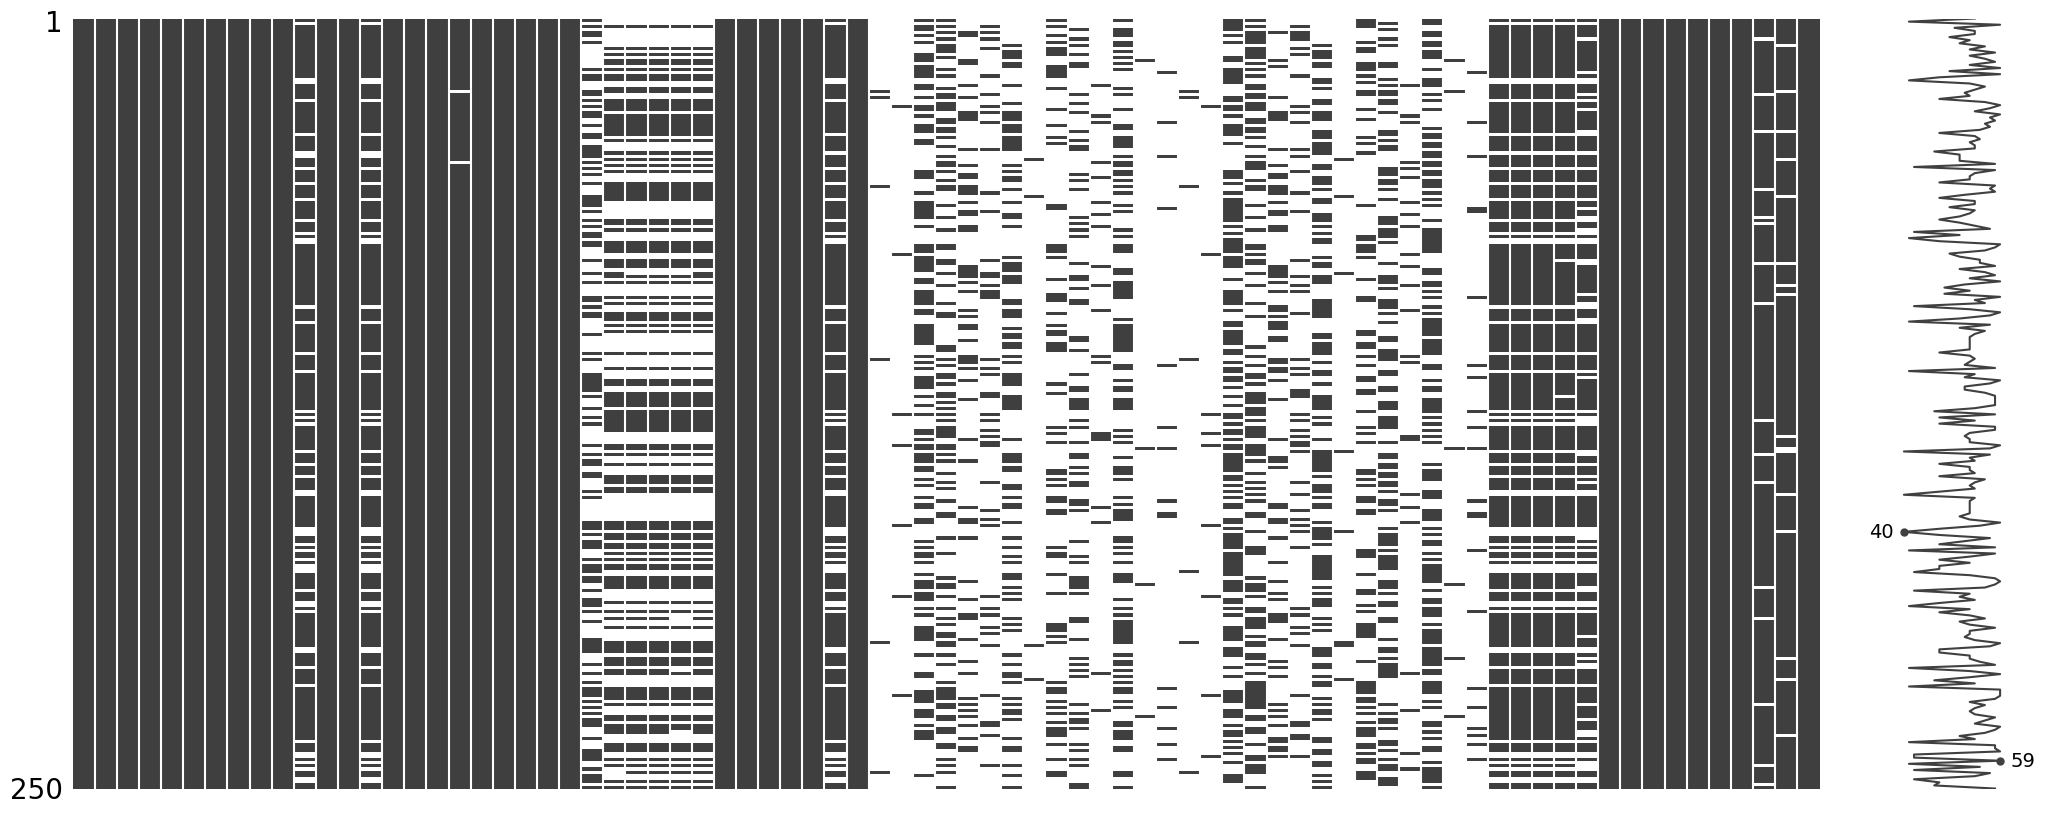

In [3]:
msno.matrix(combined_data.sample(250))

In [4]:
combined_data.columns #Show the columns of data set

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors',
       'Campaign Goal', 'Campaign Completion Rate', 'Days Left for Campaign',
       'Campaign Start Date', 'Campaign End Date',
       'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id',
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO', 'Campaign Title_y', 'Org Cause Animal Welfare',
       'Org Cause Arts & Heritage', 'Org Cause

In [5]:
# Here need change the csv file from part3_result a little bit 
# Delete the space front and end of Campaign Goal manually
# Change the number into number type instead of accounting type
# Or it can be changed into numeric number
Need_variable = ["Actual Donation Amount","NPO Ipc Status For Tax Deductibility","Distinct Donors", 'Creator Type*', "Scale_type","Sector",
       'Campaign Goal',"Campaign Start Date", "Campaign End Date", 'Campaign Image1 Id', "Distinct Donors","Scale_type",
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO', 'Org Cause Animal Welfare',
       'Org Cause Arts & Heritage', 'Org Cause Children & Youth',
       'Org Cause Community', 'Org Cause Disability', 'Org Cause Education',
       'Org Cause Elderly', 'Org Cause Environment', 'Org Cause Families',
       'Org Cause Health', 'Org Cause Humanitarian',
       'Org Cause Social Service', 'Org Cause Sports',
       'Org Cause Women & Girls', 'Cam Cause Animal Welfare',
       'Cam Cause Arts & Heritage', 'Cam Cause Children & Youth',
       'Cam Cause Community', 'Cam Cause Disability', 'Cam Cause Education',
       'Cam Cause Elderly', 'Cam Cause Environment', 'Cam Cause Families',
       'Cam Cause Health', 'Cam Cause Humanitarian',
       'Cam Cause Social Service', 'Cam Cause Sports',
       'Cam Cause Women & Girls',
]

In [6]:
extract_data = combined_data #[Need_variable]
extract_data

,Campaign Id*,Campaign Title_x,Receiving NPO Name*,Receiving NPO Id*,NPO Status*,Number of campaigns from the same NPO that started within the same Year Month,Public Campaign Access*,Creator Type*,Creator Id*,Campaign Status*,...,Org_causes,Cam_causes,S/N,Type,UEN,IPC Period,Sector,Classification,Activities,Scale_type
0,4608063,World Suicide Prevention Day 2017,SAMARITANS OF SINGAPORE,3102869,True,1,1,NPO,3102869,ENDED,...,4,2,189,Registered with IPC,S69SS0047D,From 01/4/2022 to 31/12/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",10000000
1,6102617,World Suicide Prevention Day 2018,SAMARITANS OF SINGAPORE,3102869,True,1,1,NPO,3102869,ENDED,...,4,2,189,Registered with IPC,S69SS0047D,From 01/4/2022 to 31/12/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",10000000
2,6259968,You are not alone,SAMARITANS OF SINGAPORE,3102869,True,1,1,INDIVIDUAL,3645080,ENDED,...,5,3,189,Registered with IPC,S69SS0047D,From 01/4/2022 to 31/12/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",10000000
3,6324611,Local Outreach to Suicide Survivors (LOSS),SAMARITANS OF SINGAPORE,3102869,True,1,1,NPO,3102869,ENDED,...,4,2,189,Registered with IPC,S69SS0047D,From 01/4/2022 to 31/12/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",10000000
4,6996149,PrettyStrong,SAMARITANS OF SINGAPORE,3102869,True,1,1,INDIVIDUAL,6996129,ENDED,...,4,2,189,Registered with IPC,S69SS0047D,From 01/4/2022 to 31/12/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,79435703,"Building One Community, Be Family to Migrants",ACMI MIGRANT FUND,67536353,True,3,1,INDIVIDUAL,79350852,ACTIVE,...,3,3,8,Registered with IPC,T16CC0006L,From 04/9/2022 to 03/4/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",1000000
10135,79878011,Iam poor man and unemployed please my help for...,ACMI MIGRANT FUND,67536353,True,3,1,INDIVIDUAL,79875885,ENDED,...,0,3,8,Registered with IPC,T16CC0006L,From 04/9/2022 to 03/4/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",1000000
10136,79581111,"Educating minds, transforming lives, and impac...",INTERNATIONAL COMMUNITY SCHOOL (SINGAPORE) LTD,40402683,True,1,1,INDIVIDUAL,7160772,ENDED,...,3,3,92,Registered,199303918N,Not Applicable,Education,Foreign Educational Institutions/Funds,Training & education,20000000
10137,79749975,Flag Day,"FEDERATION OF YOUTH CLUBS, SINGAPORE",3881961,True,1,1,NPO,3881961,ENDED,...,0,4,162,Registered,S62SS0052E,Not Applicable,Others,Children/Youth,Direct Services Supports other Charities,50000


<AxesSubplot: >

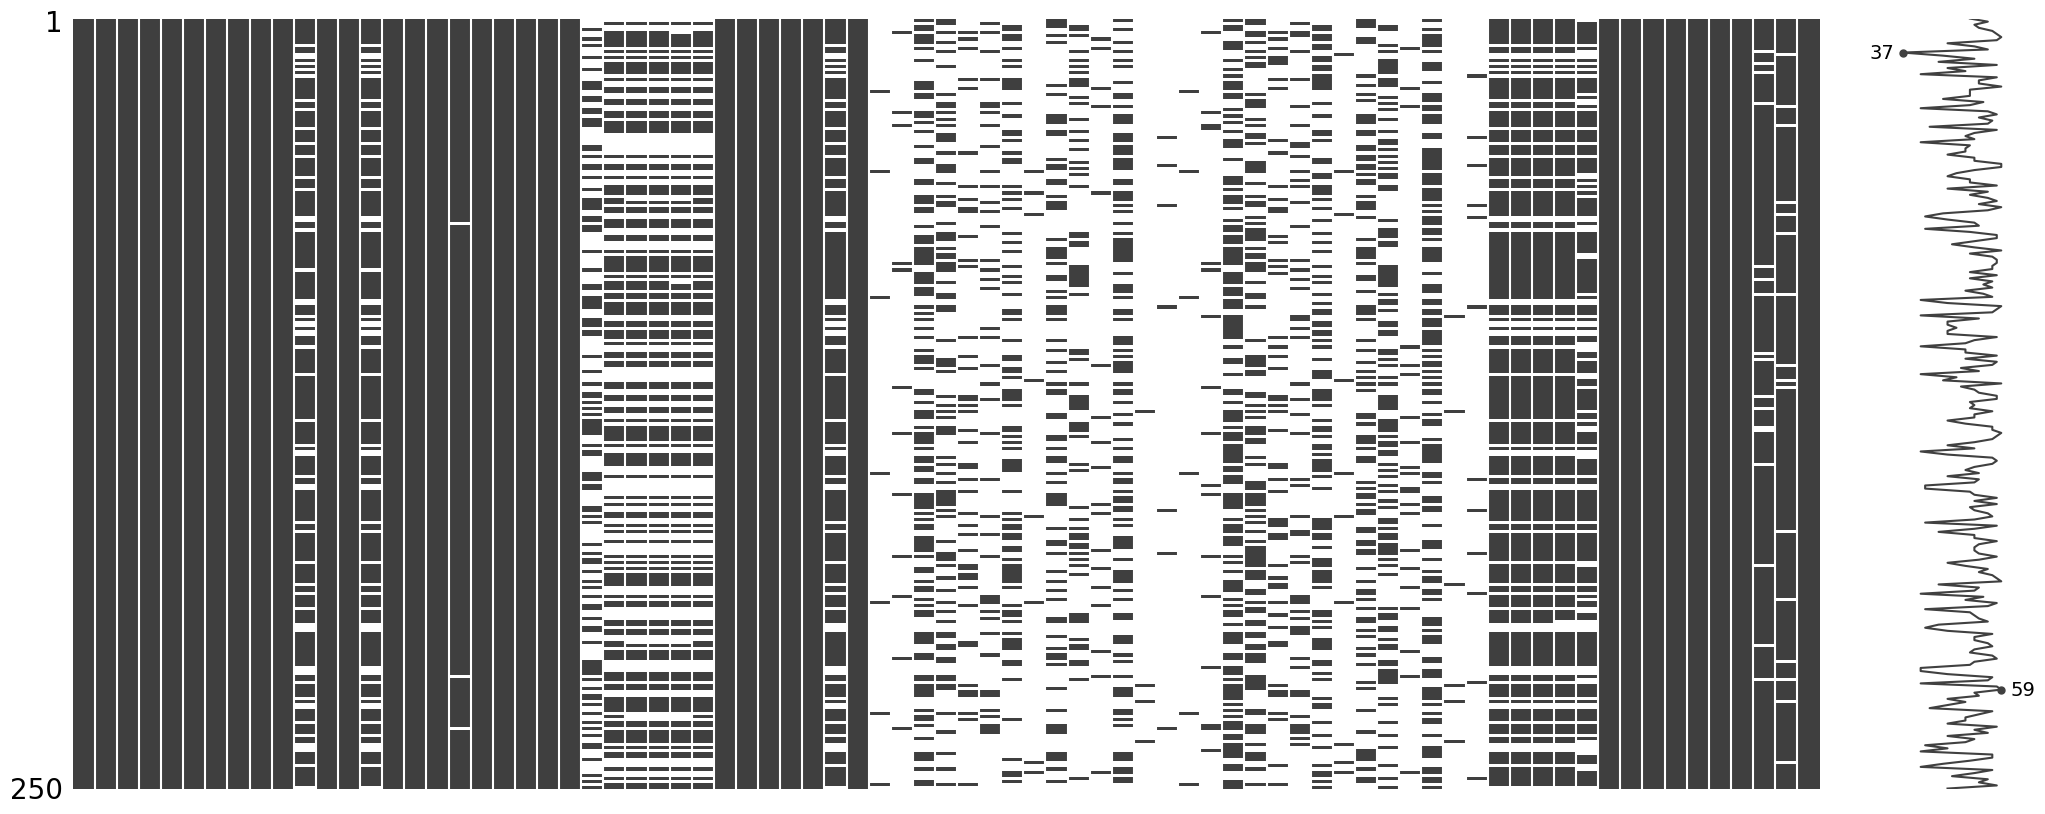

In [7]:
msno.matrix(extract_data.sample(250))

In [8]:
extract_data = extract_data.fillna('0')  #fill some missing causes data with 0

<AxesSubplot: >

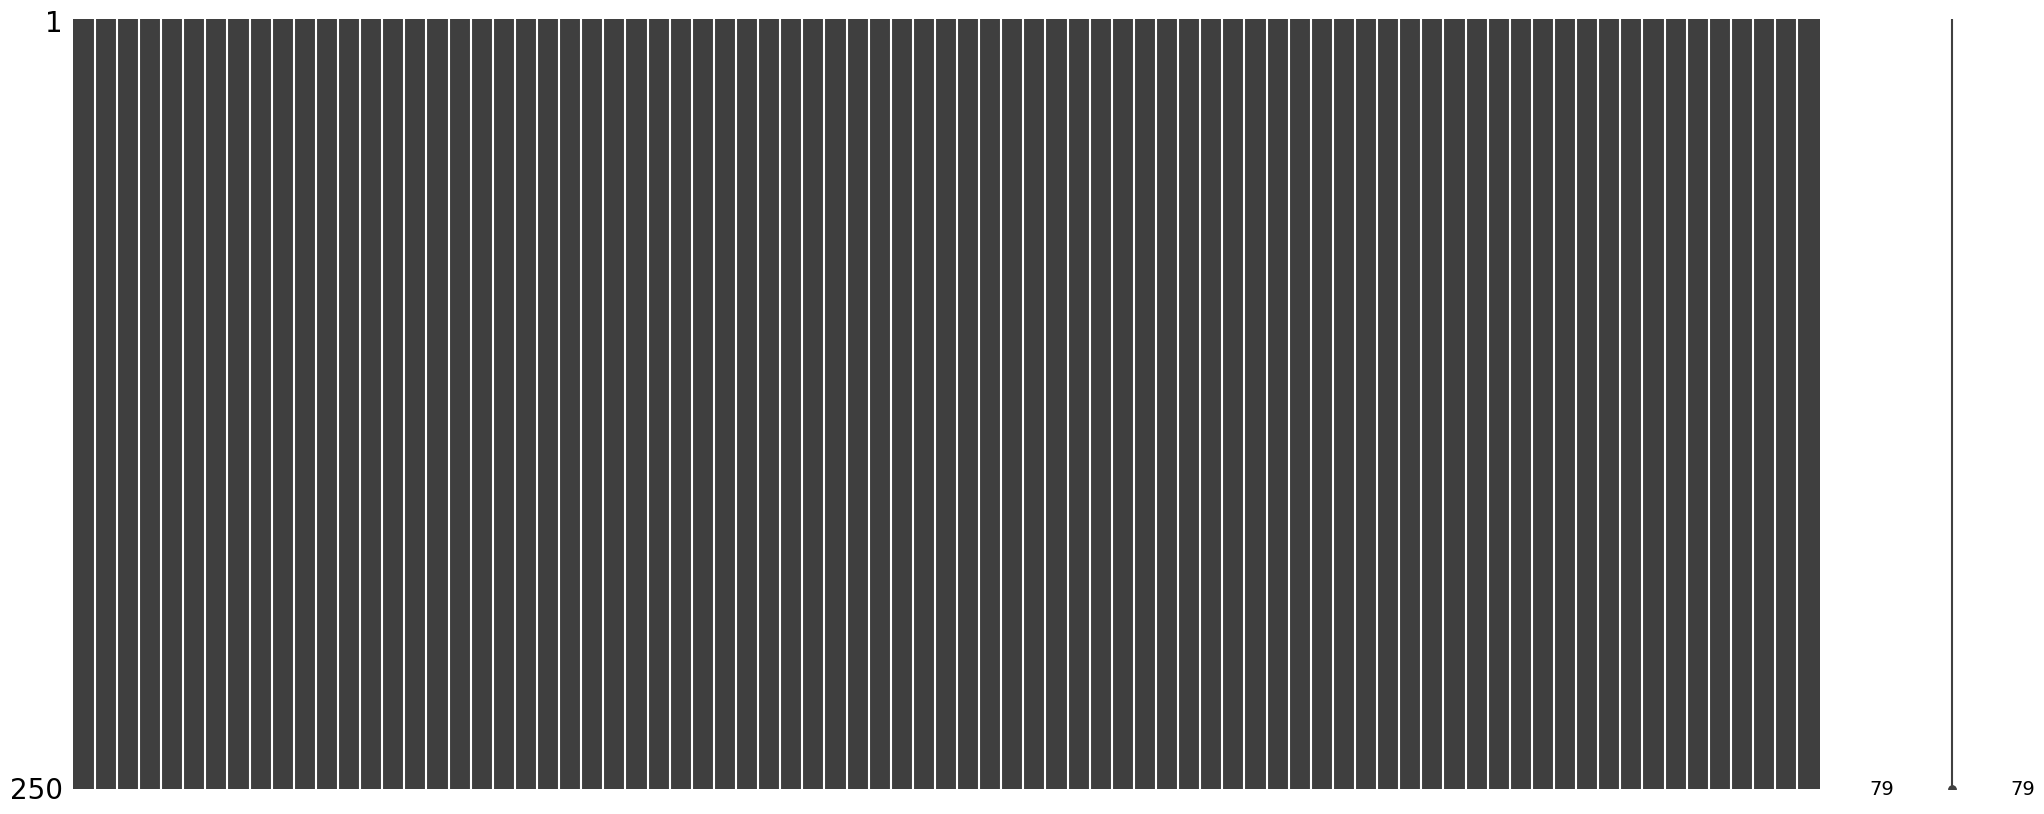

In [9]:
msno.matrix(extract_data.sample(250))

In [10]:

Total_Rows = combined_data.shape[0]  #Get the rows number 
print(Total_Rows)  #Print out total rows number 

10139


<font face = "Time New Roman" size = 5>
All variables plan to operate, ignnore other columns temporarily
</font>

<font face = "Time New Roman" size = 5>"Actual_Donation_Amount" "Campaign_Video" "Impact_Message1" "Impact_Message2" "Impact_Message3" "Impact_Message4" and "Impact_Message5" are many missing data, fill them first so that it's more convenient to operate. </font>

In [11]:
extract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10139 entries, 0 to 10138
Data columns (total 79 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Campaign Id*                                                                   10139 non-null  int64 
 1   Campaign Title_x                                                               10139 non-null  object
 2   Receiving NPO Name*                                                            10139 non-null  object
 3   Receiving NPO Id*                                                              10139 non-null  int64 
 4   NPO Status*                                                                    10139 non-null  bool  
 5   Number of campaigns from the same NPO that started within the same Year Month  10139 non-null  int64 
 6   Public Campaign Access*       

<font face = "Time New Roman" size = 5>There is no donations per donor, So add a columns of donations per donor</font>

In [12]:
extract_data.columns

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors',
       'Campaign Goal', 'Campaign Completion Rate', 'Days Left for Campaign',
       'Campaign Start Date', 'Campaign End Date',
       'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id',
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO', 'Campaign Title_y', 'Org Cause Animal Welfare',
       'Org Cause Arts & Heritage', 'Org Cause

In [13]:
extract_data['Distinct Donors'] = pd.to_numeric( extract_data['Distinct Donors']) 
extract_data['Actual Donation Amount'] = pd.to_numeric( extract_data['Actual Donation Amount']) 

In [14]:
extract_data['Creator Type*'].unique()

array(['NPO', 'INDIVIDUAL', 'Corporate', 'OTHER', 'COMMUNITY',
       'CORPORATE', 'GOVERNMENT', 'SCHOOL'], dtype=object)

In [16]:
num_deductibility = 0
extract_data['Donation_per_donor'] = 0
Creator_type = ['NPO', 'INDIVIDUAL', 'Corporate', 'OTHER', 'COMMUNITY', 'CORPORATE', 'GOVERNMENT', 'SCHOOL']
Sector = ['Social and Welfare', 'Others', 'Health', 'Arts and Heritage', 'Sports', 'Education', 'Religious', 'Community']
Campaign_Start_Year = ['2017', '2018', '2019', '2020', '2021', '2022']
for j in range(len(extract_data["Actual Donation Amount"])):
    if extract_data["Distinct Donors"].iloc[j] != 0:
        extract_data['Donation_per_donor'].iloc[j] = extract_data['Actual Donation Amount'].iloc[j]/extract_data['Distinct Donors'].iloc[j]
    else:
        extract_data['Donation_per_donor'].iloc[j] = 0

    if extract_data['NPO Ipc Status For Tax Deductibility'].iloc[j] == True:
        extract_data.loc[j, 'NPO Ipc Status For Tax Deductibility'] = 1
        num_deductibility += 1
    else:
        extract_data.loc[j, 'NPO Ipc Status For Tax Deductibility'] = 0
    if extract_data['Creator Type*'].iloc[j] == Creator_type[0]:
        extract_data['Creator Type*'].iloc[j] = 0
    if extract_data['Creator Type*'].iloc[j] == Creator_type[1]:
        extract_data['Creator Type*'].iloc[j] = 1
    if extract_data['Creator Type*'].iloc[j] == Creator_type[2]:
        extract_data['Creator Type*'].iloc[j] = 2
    if extract_data['Creator Type*'].iloc[j] == Creator_type[3]:
        extract_data['Creator Type*'].iloc[j] = 3
    if extract_data['Creator Type*'].iloc[j] == Creator_type[4]:
        extract_data['Creator Type*'].iloc[j] = 4
    if extract_data['Creator Type*'].iloc[j] == Creator_type[5]:
        extract_data['Creator Type*'].iloc[j] = 5
    if extract_data['Creator Type*'].iloc[j] == Creator_type[6]:
        extract_data['Creator Type*'].iloc[j] = 6
    if extract_data['Creator Type*'].iloc[j] == Creator_type[7]:
        extract_data['Creator Type*'].iloc[j] = 7

    if extract_data['Sector'].iloc[j] == Sector[0]:
        extract_data['Sector'].iloc[j] = 0
    if extract_data['Sector'].iloc[j] == Sector[1]:
        extract_data['Sector'].iloc[j] = 1
    if extract_data['Sector'].iloc[j] == Sector[2]:
        extract_data['Sector'].iloc[j] = 2
    if extract_data['Sector'].iloc[j] == Sector[3]:
        extract_data['Sector'].iloc[j] = 3
    if extract_data['Sector'].iloc[j] == Sector[4]:
        extract_data['Sector'].iloc[j] = 4
    if extract_data['Sector'].iloc[j] == Sector[5]:
        extract_data['Sector'].iloc[j] = 5
    if extract_data['Sector'].iloc[j] == Sector[6]:
        extract_data['Sector'].iloc[j] = 6
    if extract_data['Sector'].iloc[j] == Sector[7]:
        extract_data['Sector'].iloc[j] = 7


    
print("Number of deductibility:", num_deductibility)

Number of deductibility: 9633


# <font size =6 face = 'time new roman' color = red> Here is the Number of deducbility: 9633/10139 = 95.01%</font>

# <font size =6 face = 'time new roman'> Calculate the numbers of "org_causes" and "camp_causes" </font>

In [17]:
Org_causes = ['Org Cause Animal Welfare', 'Org Cause Arts & Heritage',
       'Org Cause Children & Youth', 'Org Cause Community',
       'Org Cause Disability', 'Org Cause Education', 'Org Cause Elderly',
       'Org Cause Environment', 'Org Cause Families', 'Org Cause Health',
       'Org Cause Humanitarian', 'Org Cause Social Service',
       'Org Cause Sports', 'Org Cause Women & Girls',
       ]
Cam_causes = ['Cam Cause Animal Welfare', 'Cam Cause Arts & Heritage',
       'Cam Cause Children & Youth', 'Cam Cause Community',
       'Cam Cause Disability', 'Cam Cause Education', 'Cam Cause Elderly',
       'Cam Cause Environment', 'Cam Cause Families', 'Cam Cause Health',
       'Cam Cause Humanitarian', 'Cam Cause Social Service',
       'Cam Cause Sports', 'Cam Cause Women & Girls']
Length_Org_causes = len(Org_causes)
Length_Cam_causes = len(Cam_causes)
extract_data['Org_causes'] = 0
extract_data['Cam_causes'] = 0

for j in range(Total_Rows):
    num_Org_causes = 0
    num_Cam_causes = 0
    for position1 in range(Length_Org_causes):
        num_Org_causes += 1 if extract_data[Org_causes[position1]].iloc[j] != '0' else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    for position2 in range(Length_Cam_causes):
        num_Cam_causes += 1 if extract_data[Cam_causes[position2]].iloc[j] != '0' else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    extract_data['Cam_causes'].iloc[j] = num_Cam_causes


<font face = "Time New Roman" size = 5>Add a columns of numbers of images</font>

In [18]:
Add_Campaign_Image_num = lambda x0,x1,x2,x3,x4: (x0 != 0).astype(np.int) +(x1 != 0).astype(np.int) + (x2 != 0).astype(np.int) + (x3 != 0).astype(np.int) + (x4 != 0).astype(np.int)
extract_data["Campaign_Image_num"] = Add_Campaign_Image_num(extract_data["Campaign Image1 Id"],extract_data["Campaign Image2 Id"],extract_data["Campaign Image3 Id"],extract_data["Campaign Image4 Id"],extract_data["Campaign Image5 Id"])

<font face = "Time New Roman" size = 5>Classfy video into “0” and ”1“ two categories</font>

In [19]:
Video_or_not = lambda x0: (x0 != '0').astype(np.int)

extract_data["Campaign Video"] = Video_or_not(extract_data["Campaign Video"])
extract_data["Campaign Video"].unique()

array([1, 0])

<font face = "Time New Roman" size = 5> The format of the date needs to be modified and the duration will be calculated below </font>

In [20]:
month_dictionary = {'Jan':'1',
 'Feb':'2',
 'Mar':'3',
 'Apr':'4',
 'May':'5',
 'Jun':'6',
 'Jul':'7',
 'Aug':'8',
 'Sep':'9',
 'Oct':'10',
 'Nov':'11',
 'Dec':'12'}
extract_data['Campaign_Start_Day'] = '0'
extract_data['Campaign_Start_Month'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_End_Day'] = '0'
extract_data['Campaign_End_Month'] = '0'
extract_data['Campaign_End_Year'] = '0'
extract_data['Campaign_Start'] = '0'
extract_data['Campaign_End'] = '0'
extract_data['duration_day'] = '0'
i = 0

# Get the detail infomation of data
for row in extract_data['Campaign Start Date']:
    extract_data.loc[i, 'Campaign_Start_Day'] = extract_data.loc[i, 'Campaign Start Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_Start_Month'] = month_dictionary[ extract_data.loc[i, 'Campaign Start Date'].split('-', 3 )[1] ] 
    extract_data.loc[i, 'Campaign_Start_Year'] = '20'+ extract_data.loc[i, 'Campaign Start Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_End_Day'] = extract_data.loc[i, 'Campaign End Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_End_Month'] = month_dictionary[extract_data.loc[i, 'Campaign End Date'].split('-', 3 )[1]]
    extract_data.loc[i, 'Campaign_End_Year'] = '20' + extract_data.loc[i, 'Campaign End Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_Start'] = extract_data.loc[i, 'Campaign_Start_Year'] + '-' + extract_data['Campaign_Start_Month'].iloc[i] + '-' + extract_data['Campaign_Start_Day'].iloc[i]
    extract_data.loc[i, 'Campaign_End'] = extract_data['Campaign_End_Year'].iloc[i] + '-' + extract_data['Campaign_End_Month'].iloc[i] + '-' + extract_data['Campaign_End_Day'].iloc[i]
    extract_data.loc[i, 'duration_day'] = (datetime.strptime(extract_data.loc[i, 'Campaign_End'], '%Y-%m-%d') - datetime.strptime(extract_data.loc[i,'Campaign_Start'], '%Y-%m-%d')).days
#    if extract_data.loc[i, 'duration_day'] < 0:
#        extract_data.loc[i, 'duration_day'] = 0
    i += 1

In [21]:

Campaign_Start_Year = ['2017', '2018', '2019', '2020', '2021', '2022']
for j in range(len(extract_data["Actual Donation Amount"])):
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[0]:
        extract_data['Campaign_Start_Year'].iloc[j] = 0
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[1]:
        extract_data['Campaign_Start_Year'].iloc[j] = 1
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[2]:
        extract_data['Campaign_Start_Year'].iloc[j] = 2
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[3]:
        extract_data['Campaign_Start_Year'].iloc[j] = 3
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[4]:
        extract_data['Campaign_Start_Year'].iloc[j] = 4
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[5]:
        extract_data['Campaign_Start_Year'].iloc[j] = 5


In [22]:
extract_data

,Campaign Id*,Campaign Title_x,Receiving NPO Name*,Receiving NPO Id*,NPO Status*,Number of campaigns from the same NPO that started within the same Year Month,Public Campaign Access*,Creator Type*,Creator Id*,Campaign Status*,...,Campaign_Image_num,Campaign_Start_Day,Campaign_Start_Month,Campaign_Start_Year,Campaign_End_Day,Campaign_End_Month,Campaign_End_Year,Campaign_Start,Campaign_End,duration_day
0,4608063,World Suicide Prevention Day 2017,SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,5,1,1,0,10,9,2017,2017-1-1,2017-9-10,252
1,6102617,World Suicide Prevention Day 2018,SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,5,3,10,0,10,9,2018,2017-10-3,2018-9-10,342
2,6259968,You are not alone,SAMARITANS OF SINGAPORE,3102869,True,1,1,1,3645080,ENDED,...,5,18,11,0,29,12,2017,2017-11-18,2017-12-29,41
3,6324611,Local Outreach to Suicide Survivors (LOSS),SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,4,1,12,0,16,11,2018,2017-12-1,2018-11-16,350
4,6996149,PrettyStrong,SAMARITANS OF SINGAPORE,3102869,True,1,1,1,6996129,ENDED,...,5,8,4,1,31,12,2018,2018-4-8,2018-12-31,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,79435703,"Building One Community, Be Family to Migrants",ACMI MIGRANT FUND,67536353,True,3,1,1,79350852,ACTIVE,...,1,9,9,5,31,12,2022,2022-9-9,2022-12-31,113
10135,79878011,Iam poor man and unemployed please my help for...,ACMI MIGRANT FUND,67536353,True,3,1,1,79875885,ENDED,...,1,19,9,5,19,9,2022,2022-9-19,2022-9-19,0
10136,79581111,"Educating minds, transforming lives, and impac...",INTERNATIONAL COMMUNITY SCHOOL (SINGAPORE) LTD,40402683,True,1,1,1,7160772,ENDED,...,5,16,9,5,30,10,2022,2022-9-16,2022-10-30,44
10137,79749975,Flag Day,"FEDERATION OF YOUTH CLUBS, SINGAPORE",3881961,True,1,1,0,3881961,ENDED,...,3,8,10,5,8,10,2022,2022-10-8,2022-10-8,0


# <font size =6 face = 'time new roman' >Here delete the rows where duration_day less than 1</font>

In [23]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'duration_day'] <= 1:
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where duraiton less than 0:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where duraiton less than 0: 97


In [24]:
extract_data.columns

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors',
       'Campaign Goal', 'Campaign Completion Rate', 'Days Left for Campaign',
       'Campaign Start Date', 'Campaign End Date',
       'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id',
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO', 'Campaign Title_y', 'Org Cause Animal Welfare',
       'Org Cause Arts & Heritage', 'Org Cause

In [25]:
Impact_msg_list = ['Impact Message 1','Impact Message 2','Impact Message 3','Impact Message 4','Impact Message 5']
Msg_category_list = ['Msg1_category','Msg2_category','Msg3_category','Msg4_category','Msg5_category']
def sentence_length(s):
    return len([i for i in s.split(' ') if i])

#for j in range(len(Impact_msg_list)):
#    cnt=0
#    for s in extract_data[Impact_msg_list[j]]:
#        extract_data[Msg_category_list[j]].iloc[cnt] = 0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
#        cnt += 1
cnt=0

In [113]:
# Nunber of description words
extract_data['Num_desc_cam'] = 0
extract_data['Num_desc_NPO'] = 0
extract_data['Num_Causes'] = 0

for index, row in extract_data.iterrows():
    Count_Causes = 0
    extract_data.loc[index, 'Num_desc_cam'] = sentence_length( str(extract_data.loc[index, 'Description of Campaign']))
    extract_data.loc[index, 'Num_desc_NPO'] = sentence_length( str(extract_data.loc[index, 'Description of NPO']))
    Count_Causes = Count_Causes + sentence_length( str(extract_data.loc[index, 'Impact Message 1']))
    Count_Causes = Count_Causes + sentence_length( str(extract_data.loc[index, 'Impact Message 2']))
    Count_Causes = Count_Causes + sentence_length( str(extract_data.loc[index, 'Impact Message 3']))
    Count_Causes = Count_Causes + sentence_length( str(extract_data.loc[index, 'Impact Message 4']))
    Count_Causes = Count_Causes + sentence_length( str(extract_data.loc[index, 'Impact Message 5']))
    extract_data.loc[index, 'Num_Causes'] = Count_Causes



# <font size =6 face = 'time new roman' color = red>Remove the NPO with blank description</font>

In [27]:
num1 = 0

for index, row in extract_data.iterrows():
    if extract_data.loc[index, 'Num_desc_NPO'] <= 1:
        extract_data.drop(index, inplace=True)
        num1 += 1
print("Total delete numbers where Num_desc_NPO less than 1:", num1)  

Total_Rows = extract_data.shape[0]



Total delete numbers where Num_desc_NPO less than 1: 1987


In [28]:
Total_Rows

8055

# 把description内容筛选一遍

In [29]:
num2 = 0
num3 = 0
for index, row in extract_data.iterrows():
    if "test" in str(extract_data.loc[index, 'Description of Campaign']) or "Test" in str(extract_data.loc[index, 'Description of Campaign']) and extract_data.loc[index, 'Num_desc_cam']< 10:
        #extract_data.drop(index, inplace=True)
        num2 += 1
    if extract_data.loc[index, 'Num_desc_cam']< 5:
        num2 += 1
print("Total delete numbers:", num2)  


Total delete numbers: 291


In [30]:
# extract_data['Cam_Org_causes'] = extract_data['Org_causes']-extract_data['Cam_causes']

# Average donation per donator

In [31]:
# extract_data['Avg_donation_amount'] =  extract_data['Actual_Donation_Amount']/extract_data['Distinct_Donors']

# <font size =6 face = 'time new roman' >Here delete the rows where Actual_Donation_Amount is 0 but Distinct_Donors bigger than 0</font>

In [32]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Actual Donation Amount'] <= 0 and extract_data.loc[index,'Distinct Donors'] > 0 :
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0: 58


In [33]:
extract_data['Avg_Custom_Amount'] = (extract_data['Custom Amount 1']+extract_data['Custom Amount 2'] +extract_data['Custom Amount 3'] + extract_data['Custom Amount 4'] )/4


In [34]:
extract_data[0:10]

,Campaign Id*,Campaign Title_x,Receiving NPO Name*,Receiving NPO Id*,NPO Status*,Number of campaigns from the same NPO that started within the same Year Month,Public Campaign Access*,Creator Type*,Creator Id*,Campaign Status*,...,Campaign_Start_Year,Campaign_End_Day,Campaign_End_Month,Campaign_End_Year,Campaign_Start,Campaign_End,duration_day,Num_desc_cam,Num_desc_NPO,Avg_Custom_Amount
0,4608063,World Suicide Prevention Day 2017,SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,0,10,9,2017,2017-1-1,2017-9-10,252,161,163,90.0
1,6102617,World Suicide Prevention Day 2018,SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,0,10,9,2018,2017-10-3,2018-9-10,342,241,163,90.0
2,6259968,You are not alone,SAMARITANS OF SINGAPORE,3102869,True,1,1,1,3645080,ENDED,...,0,29,12,2017,2017-11-18,2017-12-29,41,184,163,0.0
3,6324611,Local Outreach to Suicide Survivors (LOSS),SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,0,16,11,2018,2017-12-1,2018-11-16,350,159,163,0.0
4,6996149,PrettyStrong,SAMARITANS OF SINGAPORE,3102869,True,1,1,1,6996129,ENDED,...,1,31,12,2018,2018-4-8,2018-12-31,267,138,163,0.0
5,7293033,Icon Consulting Group Supports Samaritans of S...,SAMARITANS OF SINGAPORE,3102869,True,1,1,2,7268225,ENDED,...,1,21,6,2019,2018-6-22,2019-6-21,364,250,163,0.0
6,7480094,22,SAMARITANS OF SINGAPORE,3102869,True,1,1,1,7480024,ENDED,...,1,13,7,2019,2018-7-30,2019-7-13,348,255,163,0.0
7,7663153,World Suicide Prevention Day 2019,SAMARITANS OF SINGAPORE,3102869,True,3,1,0,3102869,ENDED,...,1,10,9,2019,2018-9-11,2019-9-10,364,232,163,90.0
8,7699911,SOS Flag Day 2018,SAMARITANS OF SINGAPORE,3102869,True,3,1,0,3102869,ENDED,...,1,31,12,2018,2018-9-12,2018-12-31,110,231,163,90.0
9,7722711,Hollie is running a half marathon,SAMARITANS OF SINGAPORE,3102869,True,3,1,1,7722370,ENDED,...,1,1,12,2018,2018-9-17,2018-12-1,75,191,163,0.0


# <font size =6 face = 'time new roman' >Divide 5 messages into 4 category (old version)</font>

In [35]:
#extract_data['Msg1_category'] = 0
#extract_data['Msg2_category'] = 0
#extract_data['Msg3_category'] = 0
#extract_data['Msg4_category'] = 0
#extract_data['Msg5_category'] = 0
#
extract_data['Msg_category'] = 0



for index,row in extract_data.iterrows():
    last_category = 0
    current_category = 0
    final_category = 0
    for index_col in Impact_msg_list:
        s = extract_data.loc[index, index_col]
        if(sentence_length(s)<=2): # Write nothing
            current_category = 0
        else:
            if(sentence_length(s)<=10): # Write very little
                current_category = 1
            else:
                if(sentence_length(s)<20): # Write very little
                    current_category = 2
                else:
                    current_category = 3
        if(current_category == last_category):
            last_category = current_category
        else:
            last_category = current_category if current_category>last_category else last_category # if different choose higher one
    #Msg_length = sentence_length(s)
    extract_data.loc[index,'Msg_category'] =  last_category #0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
    cnt += 1
 


# <font size =6 face = 'time new roman' >Divide 5 messages into 4 category (new version)</font>

In [36]:
extract_data.columns

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors',
       'Campaign Goal', 'Campaign Completion Rate', 'Days Left for Campaign',
       'Campaign Start Date', 'Campaign End Date',
       'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id',
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO', 'Campaign Title_y', 'Org Cause Animal Welfare',
       'Org Cause Arts & Heritage', 'Org Cause

In [37]:
extract_data['Impact Message 1']

0        Your donations help us spread the word and rea...
1        Thank you for donating - to find out more abou...
2                                                        0
3                                                        0
4                                                        0
                               ...                        
10132                   Thank you for donating 10 dollars.
10133    Every Dollar Counts! Thank you for your donati...
10134                                                    0
10136                                                    0
10138    One step to make a different in the future of ...
Name: Impact Message 1, Length: 7997, dtype: object

In [38]:
import distance
Impact_msg_list = ['Impact Message 1','Impact Message 2','Impact Message 3','Impact Message 4','Impact Message 5','Description of Campaign']
extract_data['Total_distance'] = 0
def edit_distance(s1, s2):
    return distance.levenshtein(s1, s2)
for j in range(len(Impact_msg_list)-2):
    for i in range(extract_data[Impact_msg_list[j]].shape[0]):
        str1 = extract_data[Impact_msg_list[j]].iloc[i]
        str2 = extract_data[Impact_msg_list[j+1]].iloc[i]
        extract_data['Total_distance'].iloc[i] += edit_distance(str1, str2)



In [39]:
# besed on length and distance to divide into three new category
extract_data['new_msg_category'] = 0
for index,row in extract_data.iterrows():
    if extract_data.loc[index,'Msg_category'] == 1 or extract_data.loc[index,'Msg_category'] == 2 or extract_data.loc[index,'Msg_category'] == 3:
        if extract_data.loc[index,'Total_distance'] >150:
            extract_data.loc[index,'new_msg_category'] = 3
        else:
            if extract_data.loc[index,'Total_distance'] > 0:
                extract_data.loc[index,'new_msg_category'] = 2
            else:
                extract_data.loc[index,'new_msg_category'] = 1

extract_data.iloc[0:30,28:]

,Impact Message 5,Custom Amount 1,Custom Amount 2,Custom Amount 3,Custom Amount 4,Description of Campaign,Description of NPO,Campaign Title_y,Org Cause Animal Welfare,Org Cause Arts & Heritage,...,Campaign_End_Year,Campaign_Start,Campaign_End,duration_day,Num_desc_cam,Num_desc_NPO,Avg_Custom_Amount,Msg_category,Total_distance,new_msg_category
0,Thank you for donating!,10,50,100,200,Suicide is often preventable. For those at ris...,"Founded in 1969, Samaritans of Singapore (SOS...",World Suicide Prevention Day 2017,0,0,...,2017,2017-1-1,2017-9-10,252,161,163,90.00,3,411,3
1,Thank you for donating!,10,50,100,200,Suicide is often preventable. For those at ris...,"Founded in 1969, Samaritans of Singapore (SOS...",World Suicide Prevention Day 2018,0,0,...,2018,2017-10-3,2018-9-10,342,241,163,90.00,2,197,3
2,0,0,0,0,0,The past one year plus had been a difficult on...,"Founded in 1969, Samaritans of Singapore (SOS...",You are not alone,0,0,...,2017,2017-11-18,2017-12-29,41,184,163,0.00,0,0,0
3,0,0,0,0,0,Why? ... is the question most commonly asked. ...,"Founded in 1969, Samaritans of Singapore (SOS...",Local Outreach to Suicide Survivors (LOSS),0,0,...,2018,2017-12-1,2018-11-16,350,159,163,0.00,0,0,0
4,0,0,0,0,0,We'll be conducting weekly donation based runn...,"Founded in 1969, Samaritans of Singapore (SOS...",PrettyStrong,0,0,...,2018,2018-4-8,2018-12-31,267,138,163,0.00,0,0,0
5,0,0,0,0,0,All of us at Icon Consulting Group believe tha...,"Founded in 1969, Samaritans of Singapore (SOS...",Icon Consulting Group Supports Samaritans of S...,0,0,...,2019,2018-6-22,2019-6-21,364,250,163,0.00,0,0,0
6,0,0,0,0,0,"Over the past year, I've wrestled with the ten...","Founded in 1969, Samaritans of Singapore (SOS...",22,0,0,...,2019,2018-7-30,2019-7-13,348,255,163,0.00,0,0,0
7,Suicide prevention starts with you.\r\n\r\nAll...,10,50,100,200,World Suicide Prevention day is commemorated o...,"Founded in 1969, Samaritans of Singapore (SOS...",World Suicide Prevention Day 2019,0,0,...,2019,2018-9-11,2019-9-10,364,232,163,90.00,3,195,3
8,Suicide prevention starts with you.\r\n\r\nAll...,10,50,100,200,Suicide is the leading cause of death in Singa...,"Founded in 1969, Samaritans of Singapore (SOS...",SOS Flag Day 2018,0,0,...,2018,2018-9-12,2018-12-31,110,231,163,90.00,3,306,3
9,0,0,0,0,0,"As some of you already know, Francis and I wil...","Founded in 1969, Samaritans of Singapore (SOS...",Hollie is running a half marathon,0,0,...,2018,2018-9-17,2018-12-1,75,191,163,0.00,0,0,0


Polarity and subjectivity

In [40]:
extract_data.columns

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors',
       'Campaign Goal', 'Campaign Completion Rate', 'Days Left for Campaign',
       'Campaign Start Date', 'Campaign End Date',
       'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id',
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO', 'Campaign Title_y', 'Org Cause Animal Welfare',
       'Org Cause Arts & Heritage', 'Org Cause

In [41]:
extract_data['Msg1_polarity'] = 0
extract_data['Msg1_subjectivity'] = 0
extract_data['Msg2_polarity'] = 0
extract_data['Msg2_subjectivity'] = 0
extract_data['Msg3_polarity'] = 0
extract_data['Msg3_subjectivity'] = 0
extract_data['Msg4_polarity'] = 0
extract_data['Msg4_subjectivity'] = 0
extract_data['Msg5_polarity'] = 0
extract_data['Msg5_subjectivity'] = 0
extract_data['Description_Campaign_polarity'] = 0
extract_data['Description_Campaign_subjectivity'] = 0

from textblob import TextBlob
# polarity项为文本积极性，是在[-1.0，1.0]范围内的浮点数
# subjectivity项为主观评分，是在[0.0，1.0]范围内的浮点数，其中0.0是非常客观的，而1.0是非常主观的
Impact_msg_list = ['Impact Message 1','Impact Message 2','Impact Message 3','Impact Message 4','Impact Message 5','Description of Campaign']
Msg_polarity_list = ['Msg1_polarity','Msg2_polarity','Msg3_polarity','Msg4_polarity','Msg5_polarity','Description_Campaign_polarity']
Msg1_subjectivity_list = ['Msg1_subjectivity','Msg2_subjectivity','Msg3_subjectivity','Msg4_subjectivity','Msg5_subjectivity','Description_Campaign_subjectivity']
for j in range(len(Impact_msg_list)):
    t=0
    for i in extract_data[Impact_msg_list[j]]:
        blob = TextBlob(str(i))
        sentiment = blob.sentiment
        extract_data[Msg_polarity_list[j]].iloc[t] = sentiment.polarity
        extract_data[Msg1_subjectivity_list[j]].iloc[t] = sentiment.subjectivity
        t+=1
# sum the total five messages polarity and subjectivity 
extract_data["Total_Msg_polarity"] = extract_data["Msg1_polarity"]+extract_data["Msg2_polarity"]+extract_data["Msg3_polarity"]+extract_data["Msg4_polarity"]+extract_data["Msg5_polarity"]
extract_data["Total_Msg_subjectivity"] = extract_data["Msg1_subjectivity"]+extract_data["Msg2_subjectivity"]+extract_data["Msg3_subjectivity"]+extract_data["Msg4_subjectivity"]+extract_data["Msg5_subjectivity"]
extract_data.iloc[0:30,28:]


,Impact Message 5,Custom Amount 1,Custom Amount 2,Custom Amount 3,Custom Amount 4,Description of Campaign,Description of NPO,Campaign Title_y,Org Cause Animal Welfare,Org Cause Arts & Heritage,...,Msg3_polarity,Msg3_subjectivity,Msg4_polarity,Msg4_subjectivity,Msg5_polarity,Msg5_subjectivity,Description_Campaign_polarity,Description_Campaign_subjectivity,Total_Msg_polarity,Total_Msg_subjectivity
0,Thank you for donating!,10,50,100,200,Suicide is often preventable. For those at ris...,"Founded in 1969, Samaritans of Singapore (SOS...",World Suicide Prevention Day 2017,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.405556,0.666667,0.350000,0.550000
1,Thank you for donating!,10,50,100,200,Suicide is often preventable. For those at ris...,"Founded in 1969, Samaritans of Singapore (SOS...",World Suicide Prevention Day 2018,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.223036,0.629286,0.500000,0.500000
2,0,0,0,0,0,The past one year plus had been a difficult on...,"Founded in 1969, Samaritans of Singapore (SOS...",You are not alone,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.300000,0.577273,0.000000,0.000000
3,0,0,0,0,0,Why? ... is the question most commonly asked. ...,"Founded in 1969, Samaritans of Singapore (SOS...",Local Outreach to Suicide Survivors (LOSS),0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.103000,0.568000,0.000000,0.000000
4,0,0,0,0,0,We'll be conducting weekly donation based runn...,"Founded in 1969, Samaritans of Singapore (SOS...",PrettyStrong,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.255303,0.558333,0.000000,0.000000
5,0,0,0,0,0,All of us at Icon Consulting Group believe tha...,"Founded in 1969, Samaritans of Singapore (SOS...",Icon Consulting Group Supports Samaritans of S...,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.370455,0.678571,0.000000,0.000000
6,0,0,0,0,0,"Over the past year, I've wrestled with the ten...","Founded in 1969, Samaritans of Singapore (SOS...",22,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.079464,0.452827,0.000000,0.000000
7,Suicide prevention starts with you.\r\n\r\nAll...,10,50,100,200,World Suicide Prevention day is commemorated o...,"Founded in 1969, Samaritans of Singapore (SOS...",World Suicide Prevention Day 2019,0,0,...,-0.225000,0.500000,6.938894e-18,0.450000,0.275000,0.5,0.043703,0.619306,0.600000,2.450000
8,Suicide prevention starts with you.\r\n\r\nAll...,10,50,100,200,Suicide is the leading cause of death in Singa...,"Founded in 1969, Samaritans of Singapore (SOS...",SOS Flag Day 2018,0,0,...,-0.225000,0.500000,1.125000e-01,0.600000,0.275000,0.5,0.043452,0.495323,0.237500,2.550000
9,0,0,0,0,0,"As some of you already know, Francis and I wil...","Founded in 1969, Samaritans of Singapore (SOS...",Hollie is running a half marathon,0,0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.197396,0.551042,0.000000,0.000000


# 情感测试

In [42]:
#from textblob import TextBlob
#blob = TextBlob(str("So sad, unhappy. Catastrophe, fear"))
#sentiment = blob.sentiment
#print(sentiment.polarity)

In [43]:

extract_data['Campaign Promise'] = extract_data["Campaign_Start_Year"] * extract_data["Avg_Custom_Amount"]

<font face = "Time New Roman" size = 5>  Convert to numeric type</font>

In [44]:
numeric_features1 = ['Actual Donation Amount', 'Campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'duration_day',
                     'Campaign Video',  'Campaign_Image_num','Num_desc_cam',  'Cam_causes', 'Description_Campaign_polarity',"Creator Type*","Campaign_Start_Year", 'Campaign Promise']

extract_data['Actual Donation Amount'] = pd.to_numeric( extract_data['Actual Donation Amount'])
extract_data['Campaign Goal'] = pd.to_numeric( extract_data['Campaign Goal'])
extract_data['NPO Ipc Status For Tax Deductibility'] = pd.to_numeric( extract_data['NPO Ipc Status For Tax Deductibility'])
extract_data['duration_day'] = pd.to_numeric( extract_data['duration_day'])
extract_data['Campaign Video'] = pd.to_numeric( extract_data['Campaign Video'])
extract_data['Campaign_Image_num'] = pd.to_numeric( extract_data['Campaign_Image_num'])
extract_data['Num_desc_cam'] = pd.to_numeric( extract_data['Num_desc_cam'])

extract_data['Cam_causes'] = pd.to_numeric( extract_data['Cam_causes'])
extract_data['Creator Type*'] = pd.to_numeric(extract_data['Creator Type*'])
#extract_data['Total_Msg_polarity'] = pd.to_numeric( extract_data['Total_Msg_polarity'])
extract_data['NPO Ipc Status For Tax Deductibility'] = pd.to_numeric(extract_data['NPO Ipc Status For Tax Deductibility'])
extract_data['Campaign Video'] = pd.to_numeric(extract_data['Campaign Video'])
extract_data['Campaign_Start_Year'] = pd.to_numeric(extract_data['Campaign_Start_Year'])
extract_data['Campaign Promise'] = pd.to_numeric(extract_data['Campaign Promise'])

extract_data["Distinct Donors"] = pd.to_numeric(extract_data["Distinct Donors"])
extract_data['Sector'] = pd.to_numeric( extract_data['Sector'])


In [45]:
extract_data.columns[0:]

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*',
       ...
       'Msg3_subjectivity', 'Msg4_polarity', 'Msg4_subjectivity',
       'Msg5_polarity', 'Msg5_subjectivity', 'Description_Campaign_polarity',
       'Description_Campaign_subjectivity', 'Total_Msg_polarity',
       'Total_Msg_subjectivity', 'Campaign Promise'],
      dtype='object', length=111)

In [46]:
extract_data['Campaign Video'].unique()

array([1, 0])

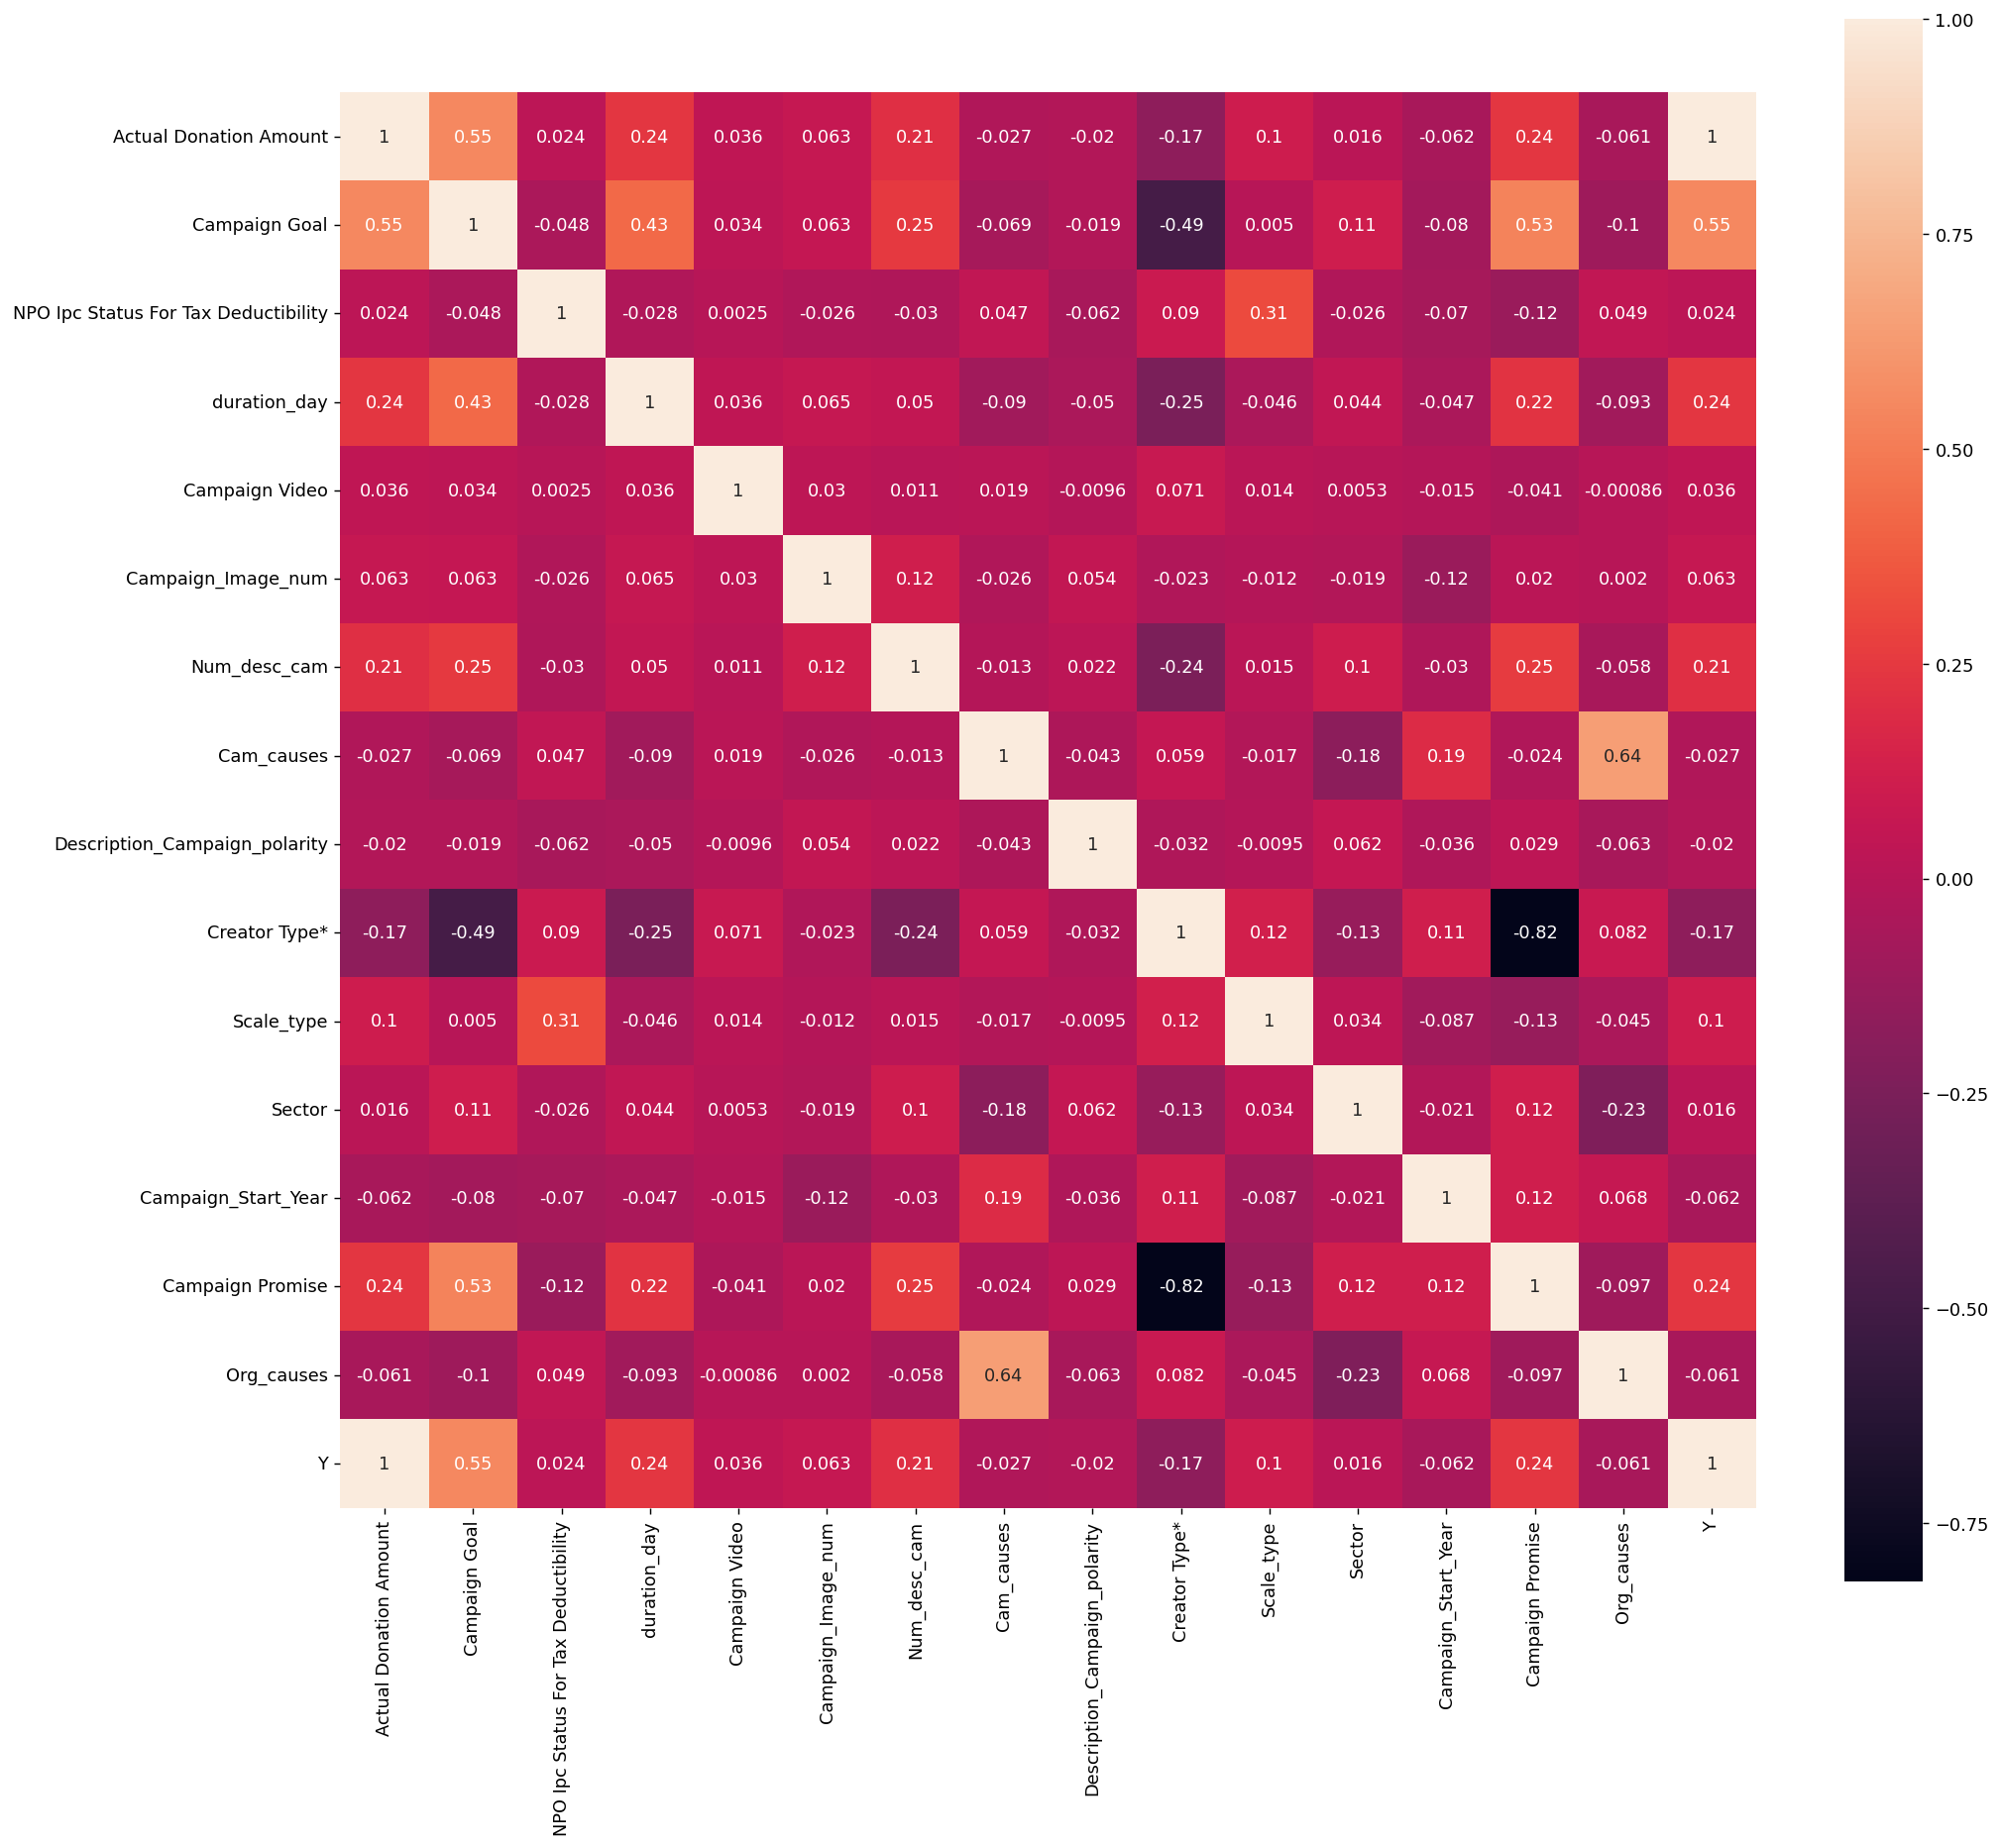

In [81]:
# Numeric_features Store the following variables that need to draw correlations
numeric_features1 = ['Actual Donation Amount', 'Campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'duration_day',
                     'Campaign Video',  'Campaign_Image_num','Num_desc_cam',  'Cam_causes', 'Description_Campaign_polarity',
                     "Creator Type*", "Scale_type", "Sector", "Campaign_Start_Year", 'Campaign Promise','Org_causes']

# Correlation analysis
price_numeric = extract_data[numeric_features1]
correlation = extract_data.corr()
y_train = extract_data['Actual Donation Amount']
corr = plt.subplots(figsize = (18,16), dpi=128)
corr= sns.heatmap(price_numeric.assign(Y=y_train).corr(method='spearman'), annot=True,square=True)

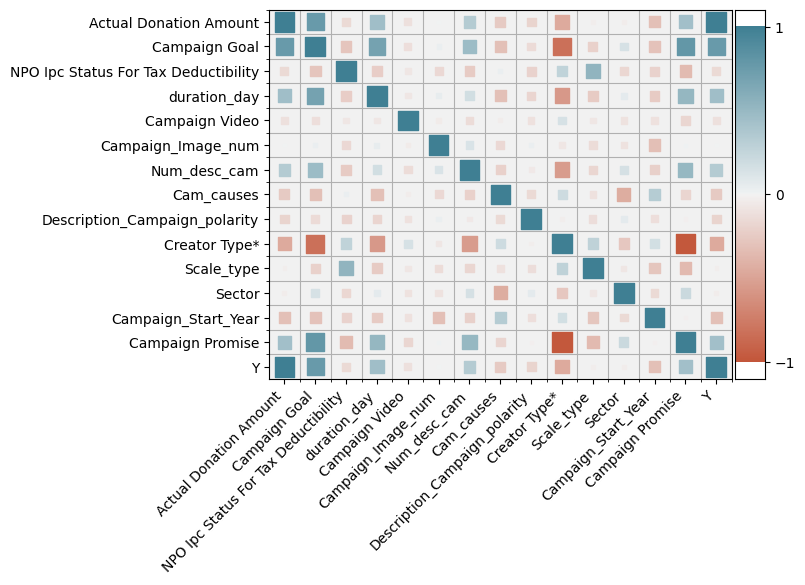

In [48]:
# pip install heatmapz

from heatmap import heatmap, corrplot

corrplot(price_numeric.assign(Y=y_train).corr(method='spearman').corr(), size_scale=200)

Do a scatter plot, using IV with a DV 

Scatter plot 1
Actual Donation Amount + Campaign Promise

Scatter plot 2
Actual Donation Amount + Campaign Promise

Scatter plot 3
Number of distinct donors   + Campaign Promise

Scatter plot 4 
Number of distinct donors  + Campaign Promise

In [49]:
extract_data.columns

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*',
       ...
       'Msg3_subjectivity', 'Msg4_polarity', 'Msg4_subjectivity',
       'Msg5_polarity', 'Msg5_subjectivity', 'Description_Campaign_polarity',
       'Description_Campaign_subjectivity', 'Total_Msg_polarity',
       'Total_Msg_subjectivity', 'Campaign Promise'],
      dtype='object', length=111)

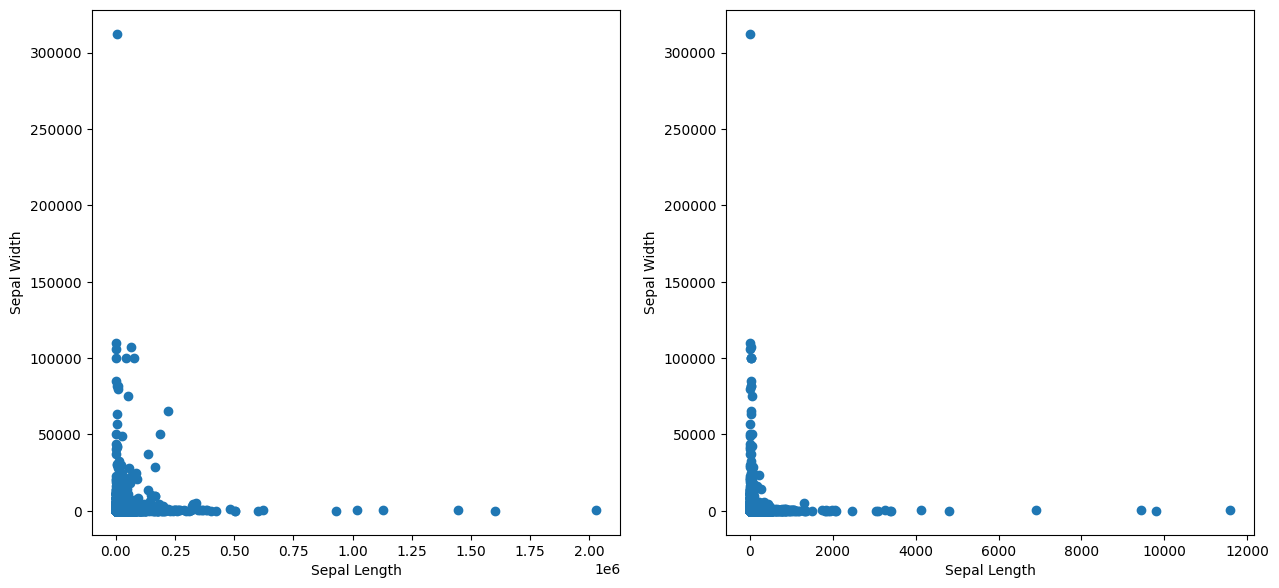

In [50]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.scatter(extract_data["Actual Donation Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(222)
plt.scatter(extract_data["Distinct Donors"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
'''
plt.subplot(223)
plt.scatter(extract_data["Actual Donation Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(224)
plt.scatter(extract_data["Actual Donation Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
'''
plt.show()

In [ ]:
plt.hist(extract_data['Actual Donation Amount'], bins=40, range=(0,300000))
plt.xlabel('Sepal Length'); plt.ylabel('Number')

In [108]:
extract_data.columns[-50:]

Index(['Cam Cause Social Service', 'Cam Cause Sports',
       'Cam Cause Women & Girls', 'Pub Enquiry Person', 'Pub Enquiry Contact',
       'Pub Enquiry Email', 'Web URL', 'Facebook Link', 'Org_causes',
       'Cam_causes', 'S/N', 'Type', 'UEN', 'IPC Period', 'Sector',
       'Classification', 'Activities', 'Scale_type', 'Donation_per_donor',
       'Campaign_Image_num', 'Campaign_Start_Day', 'Campaign_Start_Month',
       'Campaign_Start_Year', 'Campaign_End_Day', 'Campaign_End_Month',
       'Campaign_End_Year', 'Campaign_Start', 'Campaign_End', 'duration_day',
       'Num_desc_cam', 'Num_desc_NPO', 'Avg_Custom_Amount', 'Msg_category',
       'Total_distance', 'new_msg_category', 'Msg1_polarity',
       'Msg1_subjectivity', 'Msg2_polarity', 'Msg2_subjectivity',
       'Msg3_polarity', 'Msg3_subjectivity', 'Msg4_polarity',
       'Msg4_subjectivity', 'Msg5_polarity', 'Msg5_subjectivity',
       'Description_Campaign_polarity', 'Description_Campaign_subjectivity',
       'Total_Msg_po

Text(0, 0.5, 'Number')

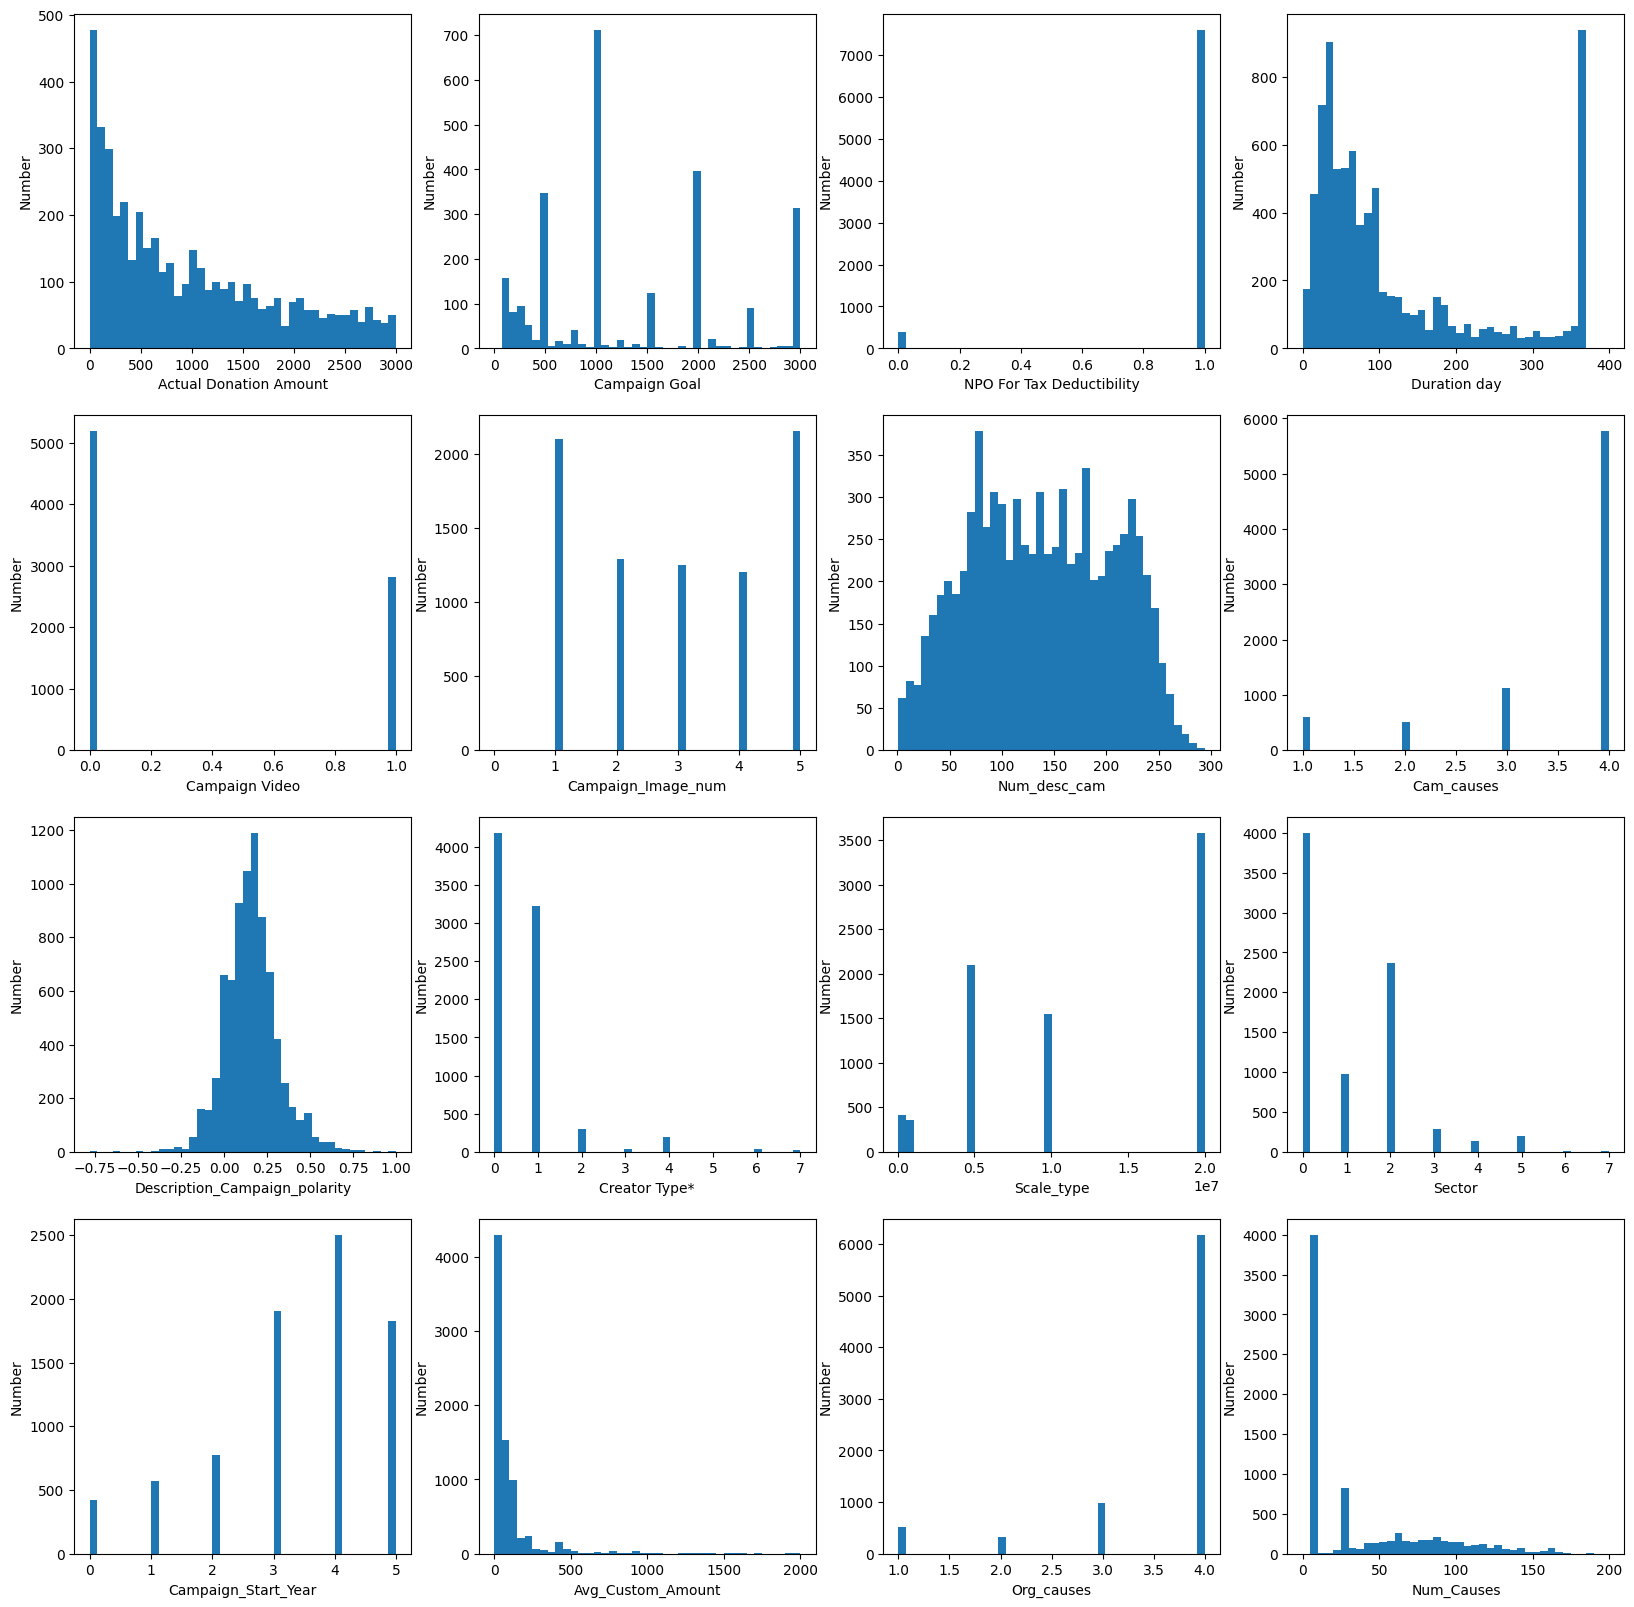

In [117]:
['Actual Donation Amount', 'Campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'duration_day',
 'Campaign Video',  'Campaign_Image_num','Num_desc_cam',  'Cam_causes', 'Description_Campaign_polarity',
 "Creator Type*", "Scale_type", "Sector", "Campaign_Start_Year", 'Campaign Promise']

plt.figure(figsize=(20,20))

plt.subplot(441)
plt.hist(extract_data['Actual Donation Amount'], bins=40, range=(0,3000))
plt.xlabel('Actual Donation Amount'); plt.ylabel('Number')

plt.subplot(442)
plt.hist(extract_data['Campaign Goal'], bins=40, range=(0,3000))
plt.xlabel('Campaign Goal'); plt.ylabel('Number')

plt.subplot(443)
plt.hist(extract_data['NPO Ipc Status For Tax Deductibility'], bins=40)
plt.xlabel('NPO For Tax Deductibility'); plt.ylabel('Number')

plt.subplot(444)
plt.hist(extract_data['duration_day'], bins=40, range=(0,400))
plt.xlabel('Duration day'); plt.ylabel('Number')

plt.subplot(445)
plt.hist(extract_data['Campaign Video'], bins=40)
plt.xlabel('Campaign Video'); plt.ylabel('Number')

plt.subplot(446)
plt.hist(extract_data['Campaign_Image_num'], bins=40)
plt.xlabel('Campaign_Image_num'); plt.ylabel('Number')

plt.subplot(447)
plt.hist(extract_data['Num_desc_cam'], bins=40)
plt.xlabel('Num_desc_cam'); plt.ylabel('Number')

plt.subplot(448)
plt.hist(extract_data['Cam_causes'], bins=40)
plt.xlabel('Cam_causes'); plt.ylabel('Number')

plt.subplot(449)
plt.hist(extract_data['Description_Campaign_polarity'], bins=40)
plt.xlabel('Description_Campaign_polarity'); plt.ylabel('Number')

plt.subplot(4,4,10)
plt.hist(extract_data['Creator Type*'], bins=40)
plt.xlabel('Creator Type*'); plt.ylabel('Number')

plt.subplot(4,4,11)
plt.hist(extract_data['Scale_type'], bins=40)
plt.xlabel('Scale_type'); plt.ylabel('Number')

plt.subplot(4,4,12)
plt.hist(extract_data['Sector'], bins=40)
plt.xlabel('Sector'); plt.ylabel('Number')

plt.subplot(4,4,13)
plt.hist(extract_data['Campaign_Start_Year'], bins=40)
plt.xlabel('Campaign_Start_Year'); plt.ylabel('Number')

plt.subplot(4,4,14)
plt.hist(extract_data['Avg_Custom_Amount'], bins=40, range=(0,2000))
plt.xlabel('Avg_Custom_Amount'); plt.ylabel('Number')

plt.subplot(4,4,15)
plt.hist(extract_data['Org_causes'], bins=40)
plt.xlabel('Org_causes'); plt.ylabel('Number')

plt.subplot(4,4,16)
plt.hist(extract_data['Num_Causes'], bins=40, range=(0,200))
plt.xlabel('Num_Causes'); plt.ylabel('Number')

<font size =6 face = 'time new roman'> Variance inflation factor (Two methods to test make sure they are right)</font>

In [51]:
'''
def vif(df, col_i):
	from statsmodels.formula.api import ols
	cols = list(df.columns)
	cols.remove(col_i)
	cols_noti = cols
	formula = col_i + '~' + '+'.join(cols_noti)
	r2 = ols(formula, df).fit().rsquared
	return 1.0 / (1.0 - r2)
	
test_data = extract_data[numeric_features1]
for i in numeric_features1:
	print(i, "\t", vif(df=test_data, col_i=i))
'''

'\ndef vif(df, col_i):\n\tfrom statsmodels.formula.api import ols\n\tcols = list(df.columns)\n\tcols.remove(col_i)\n\tcols_noti = cols\n\tformula = col_i + \'~\' + \'+\'.join(cols_noti)\n\tr2 = ols(formula, df).fit().rsquared\n\treturn 1.0 / (1.0 - r2)\n\t\ntest_data = extract_data[numeric_features1]\nfor i in numeric_features1:\n\tprint(i, "\t", vif(df=test_data, col_i=i))\n'

In [52]:
test_data = extract_data[numeric_features1]
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np

#x = test_data
x = add_constant(test_data)

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(vif)


[53.73003193232825, 1.2991503874649122, 1.3649840436169571, 1.1180450105095519, 1.0987448693506745, 1.009546894014365, 1.0347659096830912, 1.0563737519725587, 1.1221999118556742, 1.0168680795916931, 1.1023860730868835, 1.1176321449161482, 1.0603951999158048, 1.113684660378386, 1.0276981217441359]


In [53]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(tol)


[0.01861156533946373, 0.7697338273141286, 0.7326092965527887, 0.8944183736791128, 0.9101293920862359, 0.9905433872651495, 0.9664021501310005, 0.946634652870452, 0.89110682458208, 0.9834117326227152, 0.9071232160978017, 0.8947487816530423, 0.9430446309822977, 0.8979202422167146, 0.9730483873054778]


# <font size =6 face = 'time new roman' color = red> Based on the result only the "Custom_Amount1-4" 's multi collinearity is high. Other variables seem reasonable.</font>

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant 
X = test_data  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds) 

Actual Donation Amount                   1.367359
Campaign Goal                            1.523575
NPO Ipc Status For Tax Deductibility    15.184339
duration_day                             2.196129
Campaign Video                           1.551285
Campaign_Image_num                       4.528547
Num_desc_cam                             5.155816
Cam_causes                              14.164605
Description_Campaign_polarity            1.990055
Creator Type*                            1.589660
Scale_type                               4.194312
Sector                                   1.734332
Campaign_Start_Year                      6.988540
Campaign Promise                         1.043978
dtype: float64


In [55]:
'''
Clean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]
for item in Clean_variables:
     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)
     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5 * iqr
     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5 * iqr

     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5 * iqr> extract_data[item]].index)
     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5 * iqr< extract_data[item]].index)

     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')

'''

"\nClean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]\nfor item in Clean_variables:\n     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)\n     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5 * iqr\n     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5 * iqr\n\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5 * iqr> extract_data[item]].index)\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5 * iqr< extract_data[item]].index)\n\n     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')\n\n"

In [56]:
extract_data

,Campaign Id*,Campaign Title_x,Receiving NPO Name*,Receiving NPO Id*,NPO Status*,Number of campaigns from the same NPO that started within the same Year Month,Public Campaign Access*,Creator Type*,Creator Id*,Campaign Status*,...,Msg3_subjectivity,Msg4_polarity,Msg4_subjectivity,Msg5_polarity,Msg5_subjectivity,Description_Campaign_polarity,Description_Campaign_subjectivity,Total_Msg_polarity,Total_Msg_subjectivity,Campaign Promise
0,4608063,World Suicide Prevention Day 2017,SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,0.0,0.000000,0.000000,0.000000,0.0,0.405556,0.666667,0.350000,0.550000,0.00
1,6102617,World Suicide Prevention Day 2018,SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,0.0,0.000000,0.000000,0.000000,0.0,0.223036,0.629286,0.500000,0.500000,0.00
2,6259968,You are not alone,SAMARITANS OF SINGAPORE,3102869,True,1,1,1,3645080,ENDED,...,0.0,0.000000,0.000000,0.000000,0.0,0.300000,0.577273,0.000000,0.000000,0.00
3,6324611,Local Outreach to Suicide Survivors (LOSS),SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,0.0,0.000000,0.000000,0.000000,0.0,0.103000,0.568000,0.000000,0.000000,0.00
4,6996149,PrettyStrong,SAMARITANS OF SINGAPORE,3102869,True,1,1,1,6996129,ENDED,...,0.0,0.000000,0.000000,0.000000,0.0,0.255303,0.558333,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,78870615,Class Giving 2022,SINGAPORE INSTITUTE OF TECHNOLOGY,78524073,True,1,1,0,78524073,ACTIVE,...,0.0,0.000000,0.000000,0.000000,0.0,0.248258,0.390909,0.000000,0.000000,225.00
10133,79433750,ACMI Migrants' Month 2022,ACMI MIGRANT FUND,67536353,True,3,1,0,67536353,ACTIVE,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.531250,0.000000,0.000000,481.25
10134,79435703,"Building One Community, Be Family to Migrants",ACMI MIGRANT FUND,67536353,True,3,1,1,79350852,ACTIVE,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.531250,0.000000,0.000000,0.00
10136,79581111,"Educating minds, transforming lives, and impac...",INTERNATIONAL COMMUNITY SCHOOL (SINGAPORE) LTD,40402683,True,1,1,1,7160772,ENDED,...,0.0,0.000000,0.000000,0.000000,0.0,0.073864,0.306818,0.000000,0.000000,0.00


<font face = "Time New Roman" size = 6> Modeling verfication</font>

 <font face = "Time New Roman" size = 5> Variance, Average, Max, Min, Median calculation</font>

In [57]:
'''
i = 0
plt.figure(figsize=(13, 14))
plt.xticks([])
for title in numeric_features1:
    plt.subplot(4,3,i+1)
    plt.title(title)
    sns.kdeplot(extract_data[title], shade=True) 
    plt.xlabel(" ") 
    i += 1
'''
#plt.hist(extract_data['Campaign_Goal'], bins=80, histtype="stepfilled", alpha=.8)

'\ni = 0\nplt.figure(figsize=(13, 14))\nplt.xticks([])\nfor title in numeric_features1:\n    plt.subplot(4,3,i+1)\n    plt.title(title)\n    sns.kdeplot(extract_data[title], shade=True) \n    plt.xlabel(" ") \n    i += 1\n'

In [58]:
for title in numeric_features1:
    extract_data[title] = pd.to_numeric( extract_data[title])
    print( title, "Median:",np.mean(extract_data[title]))
    print( title, "Std:",np.std(extract_data[title]))
    #print( title, "Variance:" ,np.var(extract_data[title]))
    print( title, "Min:" ,np.min(extract_data[title]))
    print( title, "Max:" ,np.max(extract_data[title]))
    

Actual Donation Amount Median: 11291.444916843817
Actual Donation Amount Std: 48728.20511293687
Actual Donation Amount Min: 10.0
Actual Donation Amount Max: 2030418.0
Campaign Goal Median: 47178.769913717646
Campaign Goal Std: 137898.07472044954
Campaign Goal Min: 100
Campaign Goal Max: 4000000
NPO Ipc Status For Tax Deductibility Median: 0.9508565712142053
NPO Ipc Status For Tax Deductibility Std: 0.21616741704745934
NPO Ipc Status For Tax Deductibility Min: 0
NPO Ipc Status For Tax Deductibility Max: 1
duration_day Median: 121.67462798549457
duration_day Std: 115.80701683051193
duration_day Min: 2
duration_day Max: 630
Campaign Video Median: 0.35138176816306116
Campaign Video Std: 0.4774019492688126
Campaign Video Min: 0
Campaign Video Max: 1
Campaign_Image_num Median: 3.0
Campaign_Image_num Std: 1.563063078484117
Campaign_Image_num Min: 0
Campaign_Image_num Max: 5
Num_desc_cam Median: 138.4149055895961
Num_desc_cam Std: 66.97887713040457
Num_desc_cam Min: 1
Num_desc_cam Max: 294
Cam

# New Version 1 model

In [59]:
'''
import statsmodels.formula.api as smf

model2 = smf.ols(formula = 'Actual_Donation_Amount ~  Campaign_Goal  + NPO_Tax_Deductibility  +Campaign_Video+ Total_distance+ \
    Campaign_Image_num  + Num_desc_cam  + Num_desc_NPO + Org_causes + Cam_causes + Description_Campaign_polarity+\
     Description_Campaign_subjectivity + Avg_Custom_Amount', data = extract_data).fit()

results2 = model2.summary()
print(results2)
'''

"\nimport statsmodels.formula.api as smf\n\nmodel2 = smf.ols(formula = 'Actual_Donation_Amount ~  Campaign_Goal  + NPO_Tax_Deductibility  +Campaign_Video+ Total_distance+     Campaign_Image_num  + Num_desc_cam  + Num_desc_NPO + Org_causes + Cam_causes + Description_Campaign_polarity+     Description_Campaign_subjectivity + Avg_Custom_Amount', data = extract_data).fit()\n\nresults2 = model2.summary()\nprint(results2)\n"

<font face = "Time New Roman" size = 5> The Linear regression of selected variables</font> <font face = "Time New Roman" size = 5 color =red> Model 1</font>

In [85]:
import statsmodels.formula.api as smf
X = extract_data[[ 'Campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'duration_day', 'Campaign Video',  'Campaign_Image_num','Num_desc_cam',  'Cam_causes', 
                     'Description_Campaign_polarity',"Creator Type*", "Scale_type","Sector", "Campaign_Start_Year", 'Org_causes']] 
Y = extract_data['Actual Donation Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
predicts = model1._results
print(results1)

                              OLS Regression Results                              
Dep. Variable:     Actual Donation Amount   R-squared:                       0.230
Model:                                OLS   Adj. R-squared:                  0.229
Method:                     Least Squares   F-statistic:                     170.7
Date:                    Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                            11:01:32   Log-Likelihood:                -96620.
No. Observations:                    7997   AIC:                         1.933e+05
Df Residuals:                        7982   BIC:                         1.934e+05
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [86]:
import statsmodels.formula.api as smf
X = extract_data[[ 'Campaign Goal', 'NPO Ipc Status For Tax Deductibility', 'duration_day', 'Campaign Video',  'Campaign_Image_num','Num_desc_cam',  'Cam_causes', 
                     'Description_Campaign_polarity',"Creator Type*", "Scale_type","Sector", "Campaign_Start_Year", 'Campaign Promise', 'Org_causes']] 
Y = extract_data['Distinct Donors']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
predicts = model1._results
print(results1)


                            OLS Regression Results                            
Dep. Variable:        Distinct Donors   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 20 May 2023   Prob (F-statistic):          3.05e-271
Time:                        11:01:37   Log-Likelihood:                -55467.
No. Observations:                7997   AIC:                         1.110e+05
Df Residuals:                    7982   BIC:                         1.111e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [114]:
# Output new csv file
extract_data.to_csv('Cleaned_data_model2.csv')

In [115]:
extract_data

,Campaign Id*,Campaign Title_x,Receiving NPO Name*,Receiving NPO Id*,NPO Status*,Number of campaigns from the same NPO that started within the same Year Month,Public Campaign Access*,Creator Type*,Creator Id*,Campaign Status*,...,Msg4_polarity,Msg4_subjectivity,Msg5_polarity,Msg5_subjectivity,Description_Campaign_polarity,Description_Campaign_subjectivity,Total_Msg_polarity,Total_Msg_subjectivity,Campaign Promise,Num_Causes
0,4608063,World Suicide Prevention Day 2017,SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,0.000000,0.000000,0.000000,0.0,0.405556,0.666667,0.350000,0.550000,0.00,87
1,6102617,World Suicide Prevention Day 2018,SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,0.000000,0.000000,0.000000,0.0,0.223036,0.629286,0.500000,0.500000,0.00,54
2,6259968,You are not alone,SAMARITANS OF SINGAPORE,3102869,True,1,1,1,3645080,ENDED,...,0.000000,0.000000,0.000000,0.0,0.300000,0.577273,0.000000,0.000000,0.00,5
3,6324611,Local Outreach to Suicide Survivors (LOSS),SAMARITANS OF SINGAPORE,3102869,True,1,1,0,3102869,ENDED,...,0.000000,0.000000,0.000000,0.0,0.103000,0.568000,0.000000,0.000000,0.00,5
4,6996149,PrettyStrong,SAMARITANS OF SINGAPORE,3102869,True,1,1,1,6996129,ENDED,...,0.000000,0.000000,0.000000,0.0,0.255303,0.558333,0.000000,0.000000,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,78870615,Class Giving 2022,SINGAPORE INSTITUTE OF TECHNOLOGY,78524073,True,1,1,0,78524073,ACTIVE,...,0.000000,0.000000,0.000000,0.0,0.248258,0.390909,0.000000,0.000000,225.00,28
10133,79433750,ACMI Migrants' Month 2022,ACMI MIGRANT FUND,67536353,True,3,1,0,67536353,ACTIVE,...,0.000000,0.000000,0.000000,0.0,0.000000,0.531250,0.000000,0.000000,481.25,70
10134,79435703,"Building One Community, Be Family to Migrants",ACMI MIGRANT FUND,67536353,True,3,1,1,79350852,ACTIVE,...,0.000000,0.000000,0.000000,0.0,0.000000,0.531250,0.000000,0.000000,0.00,5
10136,79581111,"Educating minds, transforming lives, and impac...",INTERNATIONAL COMMUNITY SCHOOL (SINGAPORE) LTD,40402683,True,1,1,1,7160772,ENDED,...,0.000000,0.000000,0.000000,0.0,0.073864,0.306818,0.000000,0.000000,0.00,5


In [96]:
'''
from random import sample
mysample = sample(range(0,Total_Rows), 50)
x = combined_data['Campaign Id*'][mysample]
y = extract_data['Actual Donation Amount'][mysample]
y_fitted = model1.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted[mysample],'*',label='OLS')
'''

KeyError: '[7656, 7553, 4486, 7349, 7610] not in index'

<font face = "Time New Roman" size = 5 color = red>Test normality. fellow normal distribution or not</font>

In [ ]:
import openturns as ot
from statsmodels.stats.diagnostic import lilliefors
model_resid = model1.resid
result = lilliefors(list(model_resid))
print(result)

(0.29990439794554413, 0.0009999999999998899)


In [ ]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(list(model_resid), dist='norm')
print('stat=%.3f' % (result.statistic))
print('significance_level:', (result.significance_level))

stat=1477.906
significance_level: [15.  10.   5.   2.5  1. ]


(array([6.000e+00, 2.000e+00, 3.000e+00, 1.200e+01, 1.800e+01, 3.100e+01,
        1.190e+02, 4.808e+03, 2.764e+03, 1.270e+02, 4.000e+01, 2.700e+01,
        7.000e+00, 1.100e+01, 5.000e+00, 5.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([-3.38544920e+05, -2.96243387e+05, -2.53941853e+05, -2.11640319e+05,
        -1.69338786e+05, -1.27037252e+05, -8.47357185e+04, -4.24341848e+04,
        -1.32651168e+02,  4.21688825e+04,  8.44704162e+04,  1.26771950e+05,
         1.69073483e+05,  2.11375017e+05,  2.53676551e+05,  2.95978084e+05,
         3.38279618e+05,  3.80581152e+05,  4.22882685e+05,  4.65184219e+05,
         5.07485753e+05,  5.49787286e+05,  5.92088820e+05,  6.34390354e+05,
         6.76691887e+05,  7.18993421e+05,  7.6

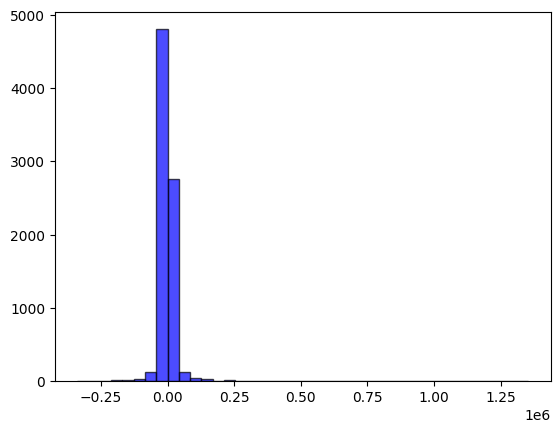

In [ ]:

plt.hist(model1.resid, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)


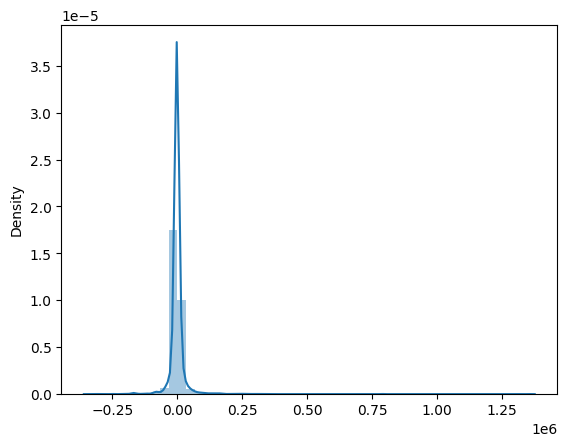

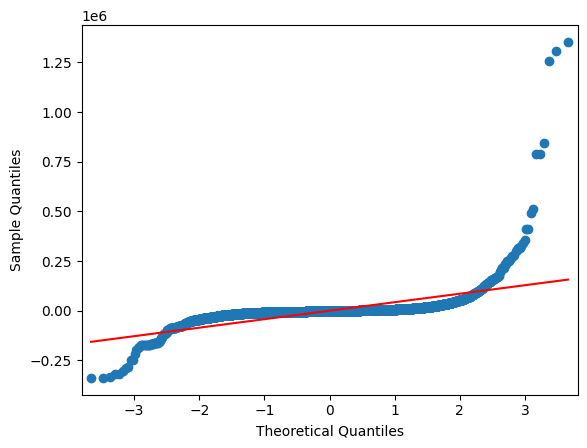

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

# 样例1



res = model1.resid # 获取了构造的模型的残差，获取了数据
# 主要调用方法
sns.distplot(res)
plt.show()
probplot = sm.ProbPlot(res) # 实例probplot
probplot.qqplot(line='s') # 调用函数

plt.show()

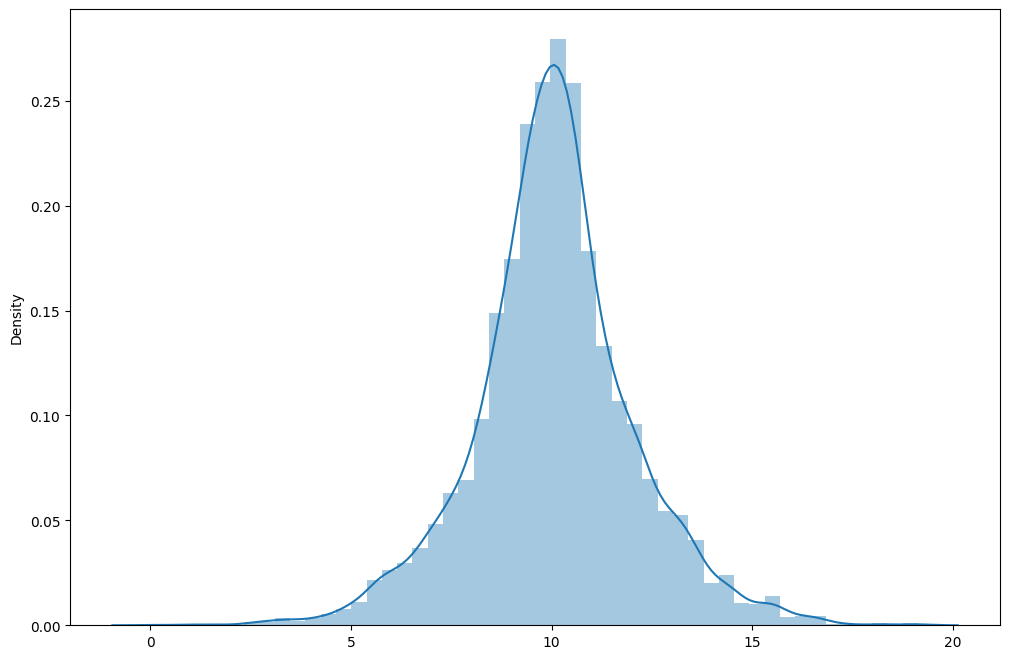

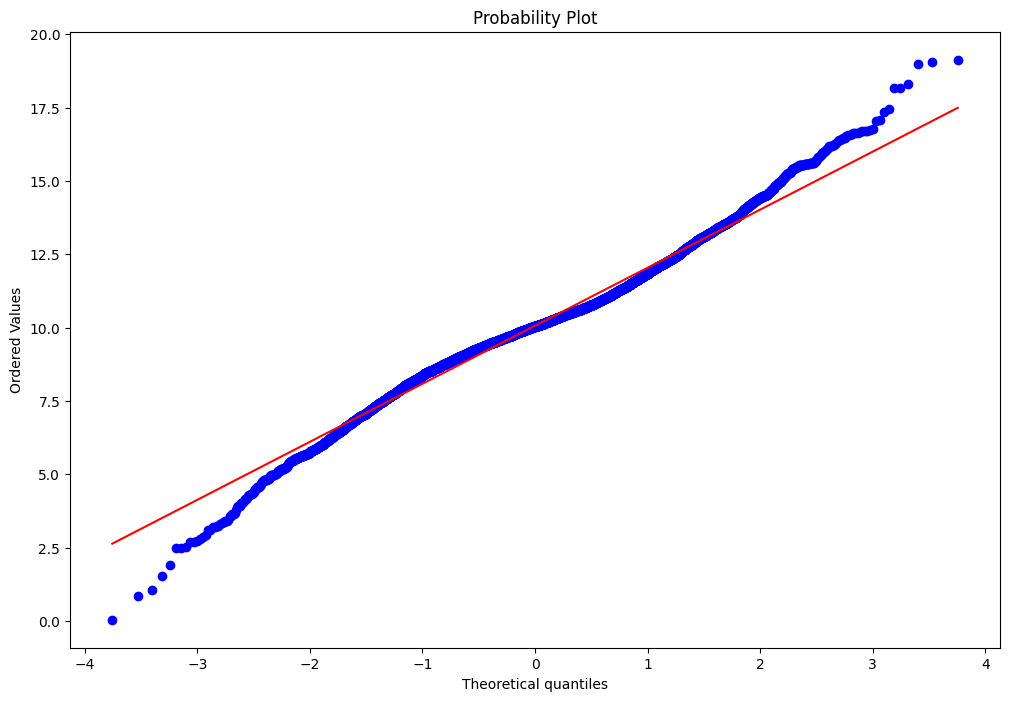

In [ ]:
from scipy.stats import norm, skew #for some statistics
res2 = abs(model_resid)
fig, ax = plt.subplots(figsize=[12,8])
converted_data1 = stats.boxcox(res2)[0] #对数据进行BOX-COX变换
sns.distplot(converted_data1)
plt.show()
fig, ax = plt.subplots(figsize=[12,8])
prob = stats.probplot(converted_data1, dist=stats.norm, plot=ax) #生成Q-Q图
plt.show()


<font face = "Time New Roman" size = 5 color =red> Model 2</font>

In [ ]:
model_resid2 = model2.resid
result = lilliefors(list(model_resid2))
print(result)

(0.3166991231981999, 0.0009999999999998899)


In [ ]:
variables_data3

NameError: name 'variables_data3' is not defined

<font face = "Time New Roman" size = 5 color =red> Model 3</font>

In [ ]:
variables_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Actual_Donation_Amount  15979 non-null  float64
 1   Campaign_Goal           15979 non-null  int64  
 2   NPO_Tax_Deductibility   15979 non-null  int64  
 3   duration_day            15979 non-null  int64  
 4   Campaign_Image_num      15979 non-null  int64  
 5   Campaign_Video          15979 non-null  int64  
 6   Msg_category            15979 non-null  int64  
 7   Num_desc_cam            15979 non-null  int64  
 8   Num_desc_NPO            15979 non-null  int64  
 9   Org_causes              15979 non-null  int64  
 10  Cam_causes              15979 non-null  int64  
 11  Custom_Amount1          15979 non-null  int64  
 12  Custom_Amount2          15979 non-null  int64  
 13  Custom_Amount3          15979 non-null  int64  
 14  Custom_Amount4          15979 non-null

In [ ]:
model3 = smf.ols(formula = 'Actual_Donation_Amount ~ Campaign_Goal  + NPO_Tax_Deductibility + duration_day + \
    Campaign_Image_num  + Campaign_Video + Msg_category+\
    Num_desc_cam + Num_desc_NPO + Org_causes + Cam_causes', data = variables_data3).fit()

results3 = model3.summary()
print(results3)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.307
Model:                                OLS   Adj. R-squared:                  0.306
Method:                     Least Squares   F-statistic:                     706.9
Date:                    Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                            23:47:28   Log-Likelihood:            -1.9632e+05
No. Observations:                   15979   AIC:                         3.927e+05
Df Residuals:                       15968   BIC:                         3.927e+05
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

# Residuals

In [ ]:
model.resid

0        -6502.023006
1        -6383.130003
2       -10109.009621
3         3680.179976
4          -31.460896
             ...     
15974    -1809.426473
15975     -307.708669
15976     2575.192535
15977     1031.338847
15978    -4940.357032
Length: 15979, dtype: float64

Author: Guo Shiping
Created by 27/Jan/2023

In [97]:
from nltk import word_tokenize, pos_tag

def determine_tense_input(sentence):
    text = word_tokenize(sentence)
    tagged = pos_tag(text)

    tense = {}
    tense["future"] = len([word for word in tagged if word[1] == "MD"])
    tense["present"] = len([word for word in tagged if word[1] in ["VBP", "VBZ","VBG"]])
    tense["past"] = len([word for word in tagged if word[1] in ["VBD", "VBN"]]) 
    return(tense)


In [101]:
determine_tense_input("Your donation is testament that suicide prevention is everyone's business.")

{'future': 3, 'present': 3, 'past': 2}